In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from joblib import dump
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FunctionTransformer
import xgboost as xgb
scaler = StandardScaler()

In [475]:
data = pd.read_csv("gym_members_exercise_tracking.csv")
data

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                        1.69           1313.0         Yoga            12.6   
1                        1.30            883.0         HIIT            33.9   
2                        1.11            677.0       Cardio            33.4   
3                        0.59            532.0     Strength            28.8   
4                        0.64            556.0     Strength            29.2   
..                        ...              ...          ...             ...   
968                      1.57           1364.0     Strength            10.0   
969                      1.38           1260.0     Strength            25.0   
970                      1.72            929.0       Cardio            18.8   
971                      1.10            883.0         HIIT            28.2   
972                      0.75            542.0     Strength            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI  
0    30.20  
1    32.00  
2    24.71  
3    18.41  
4    14.39  
..     ...  
968  28.77  
969  25.69  
970  19.50  
971  37.74  
972  33.38  

[973 rows x 15 columns]

In [476]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [477]:
data.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

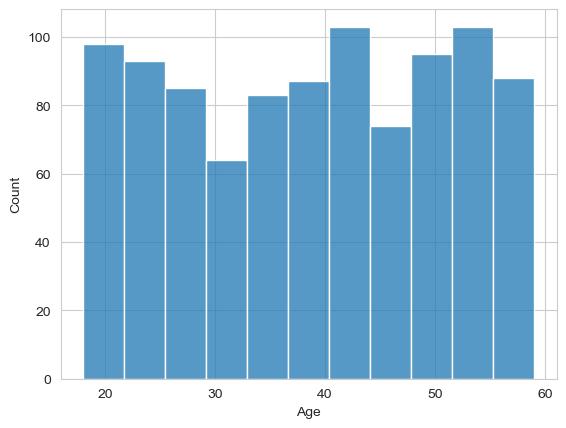

In [478]:
sns.histplot(data, x = "Age")
plt.show()

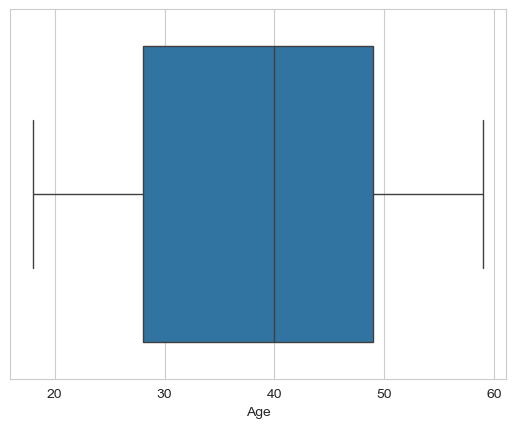

In [479]:
sns.boxplot(data, x = "Age")
plt.show()

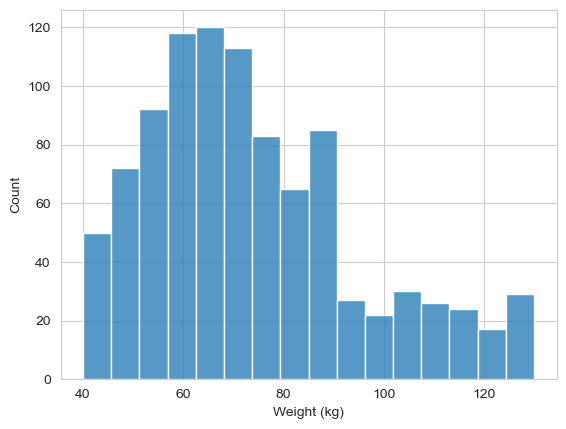

In [480]:
sns.histplot(data, x = "Weight (kg)")
plt.show()

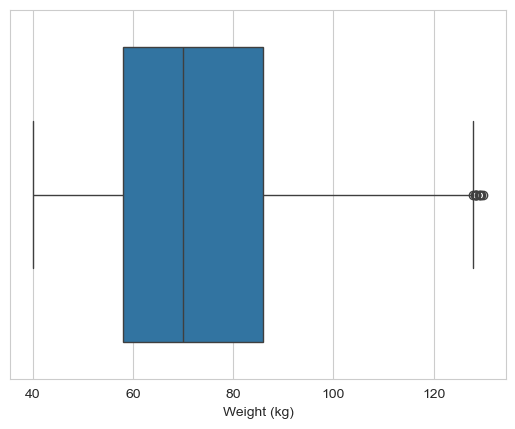

In [481]:
sns.boxplot(data, x = "Weight (kg)")
plt.show()

In [482]:
data[data["Weight (kg)"] > 129] #Only males

Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
122   56   Male        129.5        1.95      160      129           66   
593   55   Male        129.9        1.73      187      155           60   
854   48   Male        129.2        1.61      193      167           62   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
122                      1.00            639.0     Strength            25.2   
593                      0.69            529.0         Yoga            21.7   
854                      1.06            876.0         Yoga            21.4   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
122                    3.5                              2                 1   
593                    3.1                              3                 1   
854                    2.9                              4                 2   

       BMI  
122  34.06  
593  43.40  
854  49.84

In [483]:
data[data["Weight (kg)"] < 45] ##Only females

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
15    39  Female         42.5        1.75      181      131           52   
17    41  Female         43.8        1.77      182      165           58   
41    26  Female         44.3        1.60      186      136           61   
59    35  Female         44.6        1.62      196      157           65   
61    51  Female         44.8        1.63      198      137           69   
72    33  Female         40.5        1.63      181      147           66   
101   25  Female         41.2        1.62      193      144           64   
116   31  Female         42.3        1.60      163      163           70   
156   56  Female         40.4        1.80      196      165           72   
165   25  Female         43.1        1.62      196      161           65   
173   49  Female         42.0        1.52      171      130           70   
194   49  Female         40.0        1.65      188      148           74   
195   23  Female         41.9        1.58      163      132           67   
231   45  Female         44.5        1.65      162      148           71   
238   24  Female         40.4        1.64      168      168           55   
282   24  Female         42.0        1.75      174      144           55   
290   55  Female         42.9        1.69      186      140           56   
319   49  Female         44.1        1.65      189      133           74   
334   44  Female         42.8        1.78      167      159           64   
385   59  Female         42.1        1.65      172      132           59   
401   42  Female         42.7        1.74      161      130           71   
411   43  Female         42.7        1.66      173      134           53   
425   38  Female         40.6        1.79      195      161           55   
474   43  Female         42.2        1.65      162      148           59   
491   52  Female         44.1        1.62      179      121           61   
506   58  Female         44.2        1.57      183      155           59   
537   31  Female         42.7        1.76      182      121           65   
583   45  Female         41.2        1.58      195      168           71   
592   50  Female         42.7        1.53      168      155           65   
650   47  Female         43.4        1.62      179      132           64   
651   22  Female         42.8        1.56      174      133           66   
705   47  Female         40.0        1.76      173      132           63   
709   54  Female         43.8        1.65      171      129           61   
764   22  Female         40.3        1.56      192      121           57   
772   22  Female         44.8        1.72      166      132           54   
786   53  Female         44.7        1.79      164      160           72   
824   20  Female         44.2        1.61      177      122           69   
847   47  Female         41.6        1.58      160      163           68   
867   23  Female         40.9        1.75      167      145           61   
873   25  Female         41.1        1.67      186      138           71   
874   43  Female         40.5        1.74      187      143           51   
963   57  Female         43.8        1.75      180      160           73   
965   23  Female         44.1        1.62      196      122           58   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
15                       1.13            740.0     Strength            26.2   
17                       1.19            884.0       Cardio            31.9   
41                       1.08            734.0       Cardio            34.7   
59                       0.56            440.0         HIIT            32.4   
61                       1.08            666.0         Yoga            33.8   
72                       1.07            786.0         Yoga            31.9   
101                      1.49           1073.0         Yoga            28.9   
116                      1.0

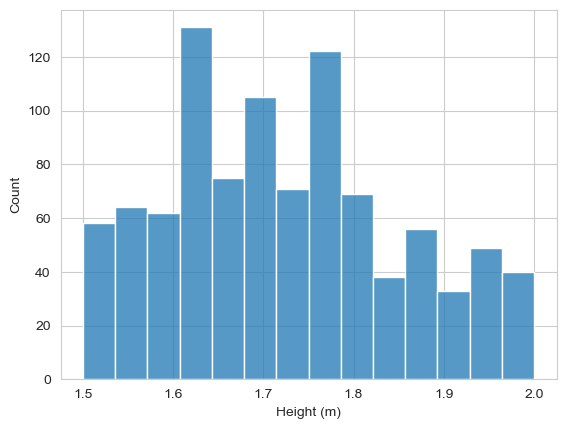

In [484]:
sns.histplot(data, x = "Height (m)")
plt.show()

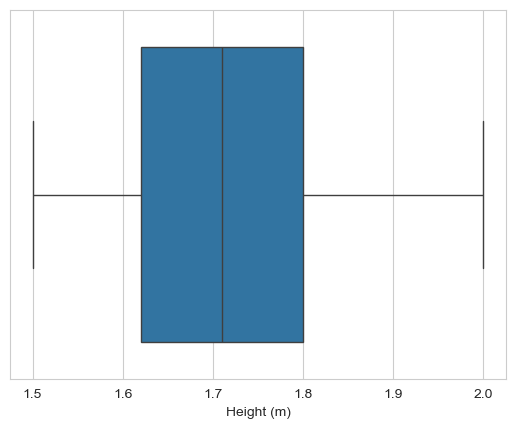

In [485]:
sns.boxplot(data, x = "Height (m)")
plt.show()

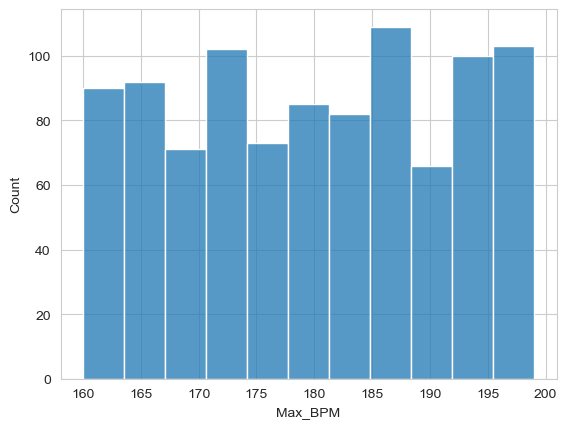

In [486]:
sns.histplot(data, x = "Max_BPM")
plt.show()

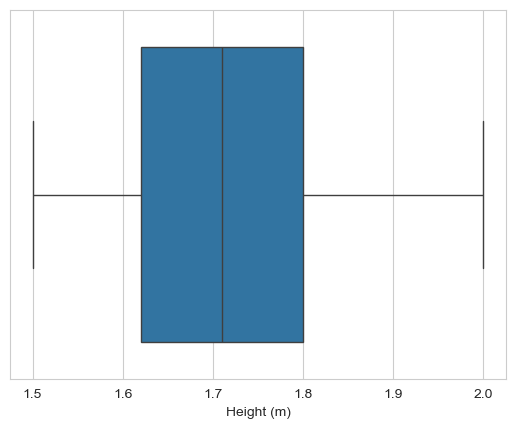

In [487]:
sns.boxplot(data, x = "Height (m)")
plt.show()

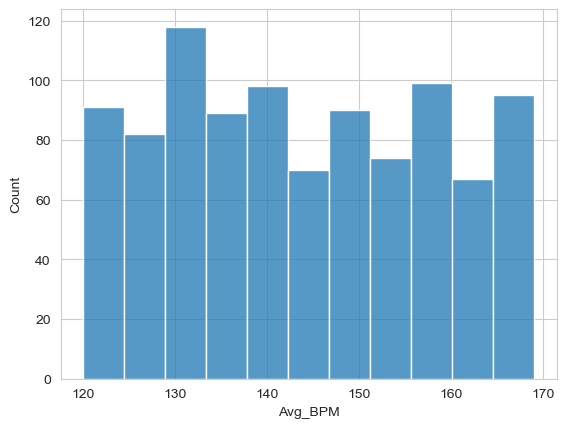

In [488]:
sns.histplot(data, x = "Avg_BPM")
plt.show()

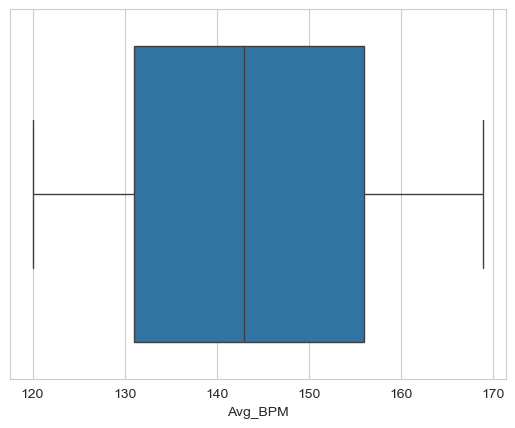

In [489]:
sns.boxplot(data, x = "Avg_BPM")
plt.show()

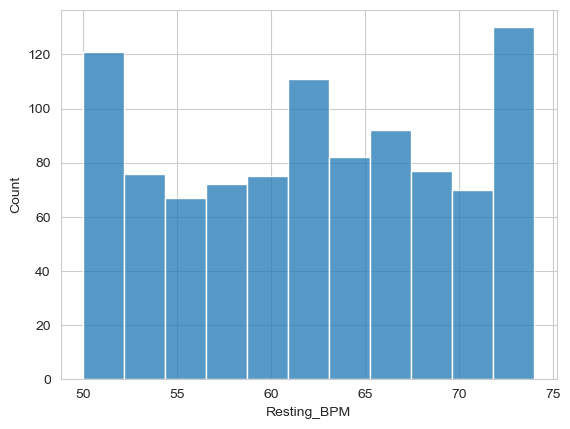

In [490]:
sns.histplot(data, x = "Resting_BPM")
plt.show()

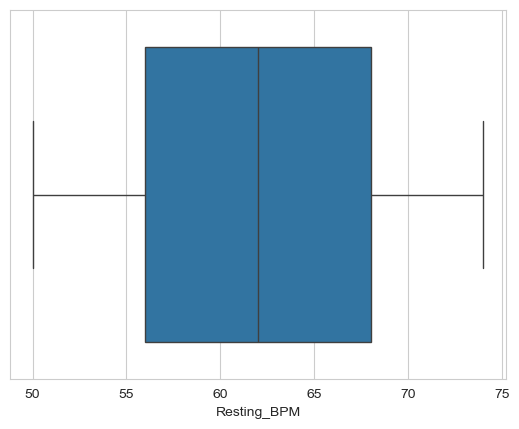

In [491]:
sns.boxplot(data, x = "Resting_BPM")
plt.show()

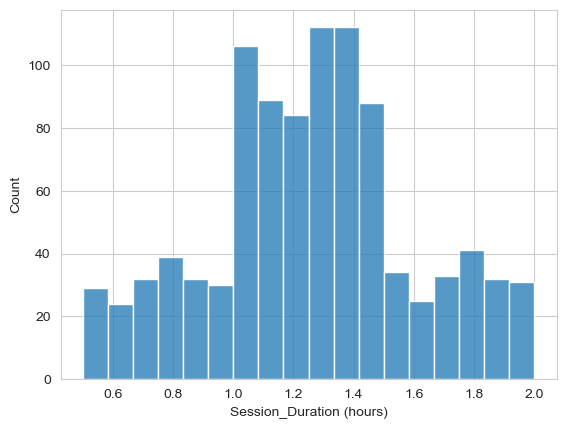

In [492]:
sns.histplot(data, x = "Session_Duration (hours)")
plt.show()

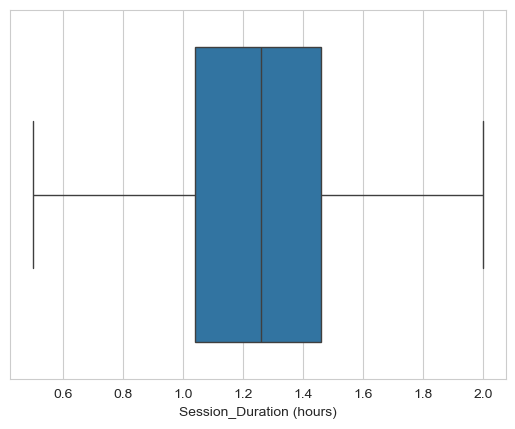

In [493]:
sns.boxplot(data, x = "Session_Duration (hours)")
plt.show()

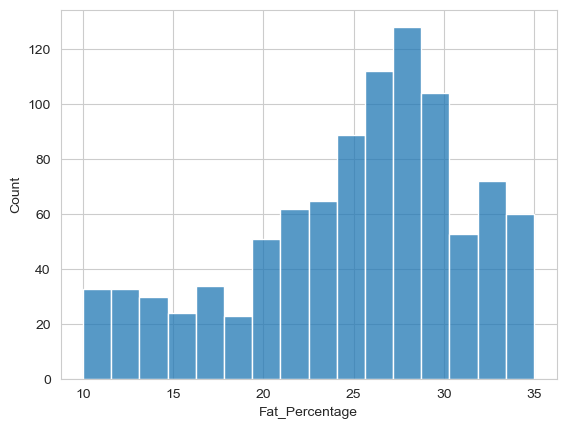

In [494]:
sns.histplot(data, x = "Fat_Percentage")
plt.show()

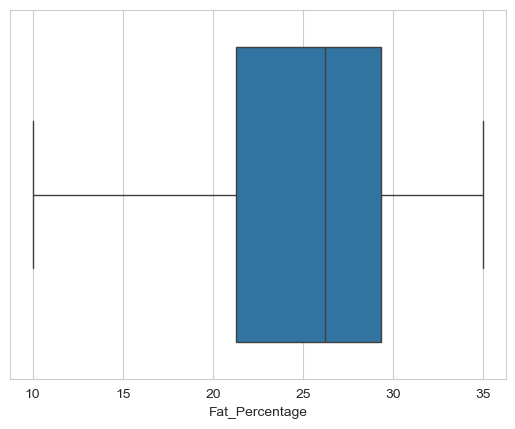

In [495]:
sns.boxplot(data, x = "Fat_Percentage")
plt.show()

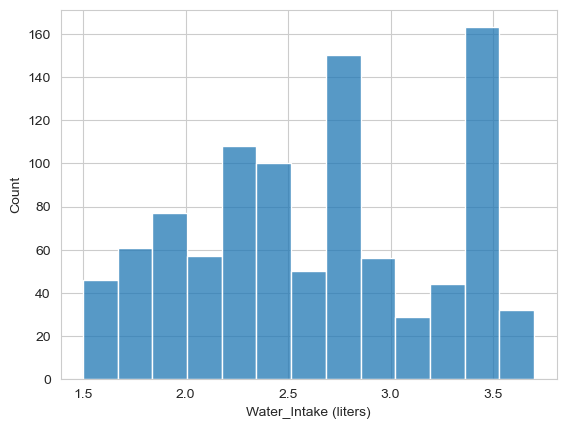

In [496]:
sns.histplot(data, x = "Water_Intake (liters)")
plt.show()

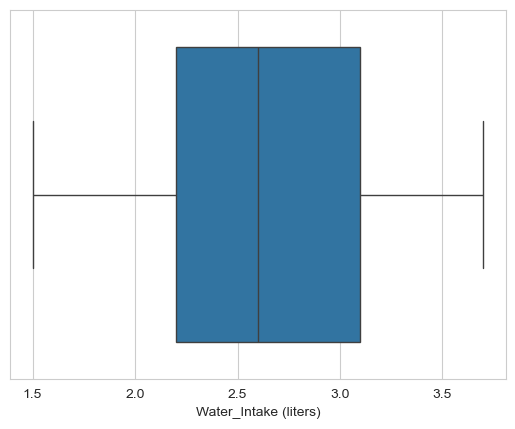

In [497]:
sns.boxplot(data, x = "Water_Intake (liters)")
plt.show()

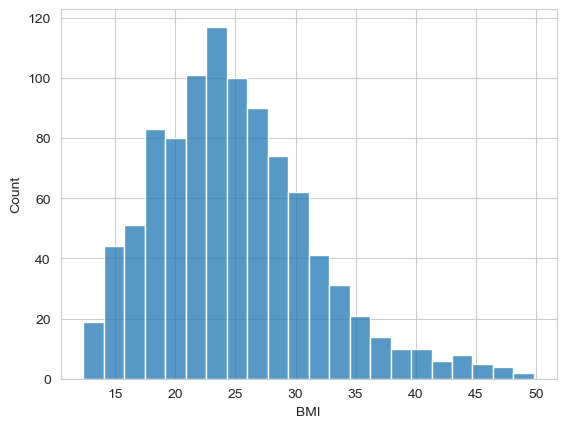

In [498]:
sns.histplot(data, x = "BMI")
plt.show()

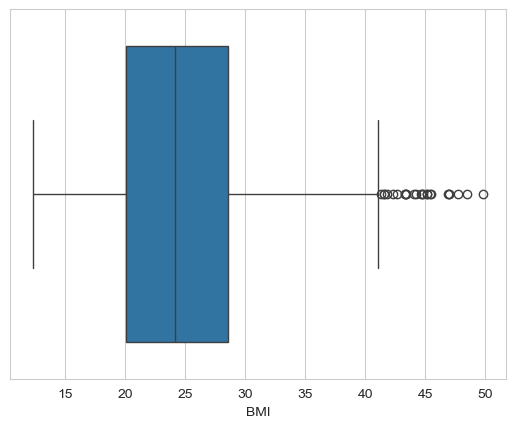

In [499]:
sns.boxplot(data, x = "BMI")
plt.show()

In [500]:
data[data["BMI"] > 42]

Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
10    41   Male        120.8        1.67      188      146           54   
12    57   Male        112.5        1.61      195      165           61   
35    26   Male        127.6        1.73      167      160           62   
55    23   Male        114.8        1.60      182      163           60   
133   21   Male        125.2        1.66      196      159           60   
251   33   Male        117.0        1.61      166      130           55   
261   57   Male        126.8        1.63      161      133           73   
291   55   Male        128.4        1.68      178      165           52   
302   36   Male        123.7        1.69      185      138           73   
345   43   Male        127.7        1.69      171      155           53   
470   34   Male        124.6        1.63      161      136           66   
524   36   Male        112.4        1.63      164      135           58   
593   55   Male        129.9        1.73      187      155           60   
687   18   Male        125.9        1.67      172      153           60   
710   38   Male        123.3        1.62      161      165           65   
833   59   Male        126.4        1.69      168      149           68   
854   48   Male        129.2        1.61      193      167           62   
868   47   Male        127.8        1.65      198      157           60   
924   18   Male        118.6        1.64      188      134           67   
936   54   Male        117.2        1.62      172      143           56   
945   35   Male        127.1        1.62      187      128           69   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
10                       0.82            593.0         HIIT            20.5   
12                       1.24           1013.0       Cardio            22.1   
35                       1.32           1162.0     Strength            27.3   
55                       1.47           1318.0       Cardio            21.7   
133                      1.38           1207.0         HIIT            29.8   
251                      1.04            744.0         HIIT            25.1   
261                      0.96            632.0         Yoga            20.8   
291                      1.13            923.0       Cardio            20.4   
302                      1.30            987.0       Cardio            20.4   
345                      1.14            875.0       Cardio            24.1   
470                      1.41           1055.0         HIIT            27.6   
524                      1.02            757.0       Cardio            25.0   
593                      0.69            529.0         Yoga            21.7   
687                      1.46           1229.0         Yoga            20.6   
710                      1.34           1216.0         Yoga            21.2   
833                      1.24            915.0     Strength            29.5   
854                      1.06            876.0         Yoga            21.4   
868                      0.77            598.0       Cardio            28.7   
924                      0.94            693.0       Cardio            25.6   
936                      1.04            736.0         HIIT            23.1   
945                      1.02            718.0     Strength            23.3   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
10                     3.0                              2                 1   
12                     2.7                              3                 2   
35                     2.9                              3                 1   
55                     2.7                              4                 2   
133                    3.4                              3                 2   
251                    2.4                              3                 2   
261                    2.1                              2     

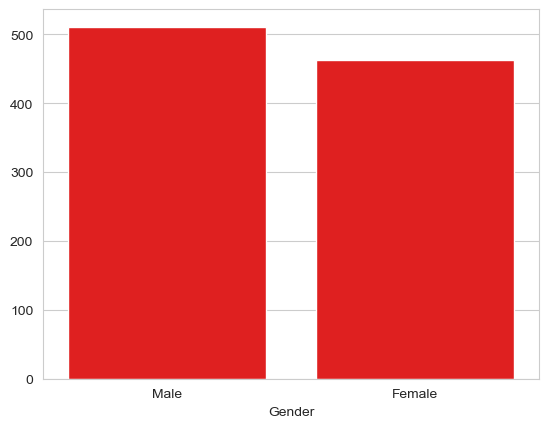

In [501]:
sns.barplot(x=data["Gender"].value_counts().index, 
            y=data["Gender"].value_counts().values, 
            color="red")
plt.show()

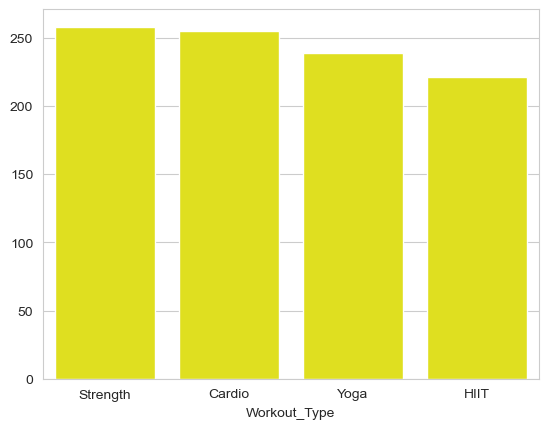

In [502]:
sns.barplot(x=data["Workout_Type"].value_counts().index, 
            y=data["Workout_Type"].value_counts().values, 
            color="yellow")
plt.show()

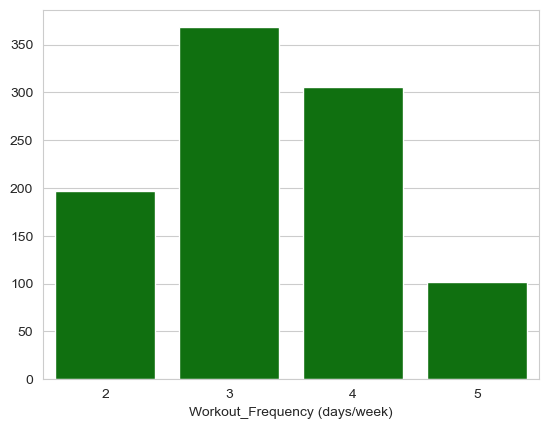

In [503]:
sns.barplot(x=data["Workout_Frequency (days/week)"].value_counts().index, 
            y=data["Workout_Frequency (days/week)"].value_counts().values, 
            color="green")
plt.show()

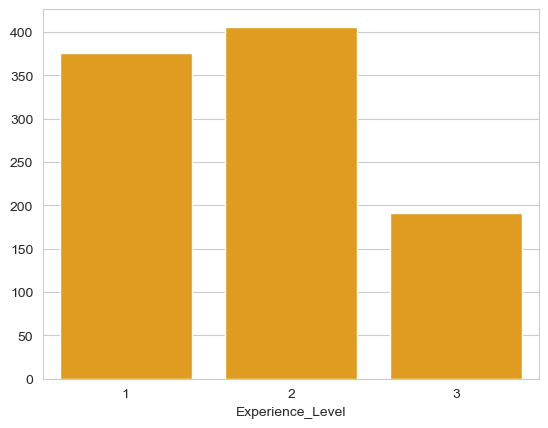

In [504]:
sns.barplot(x=data["Experience_Level"].value_counts().index, 
            y=data["Experience_Level"].value_counts().values, 
            color="orange")
plt.show()

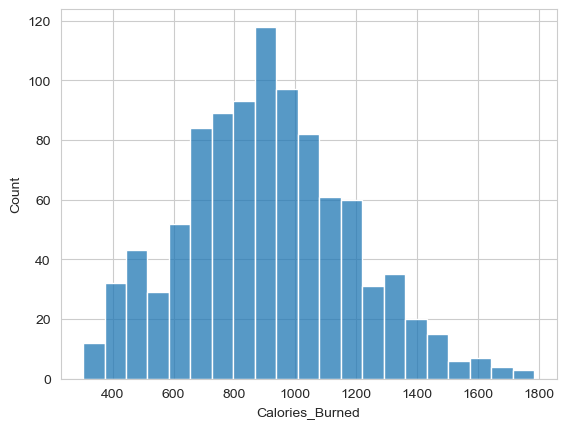

In [505]:
sns.histplot(data, x = "Calories_Burned")
plt.show()

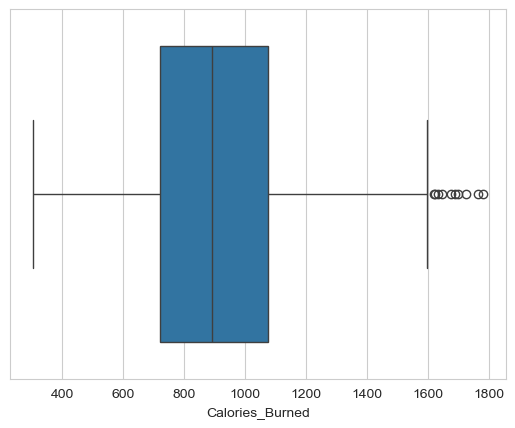

In [506]:
sns.boxplot(data, x = "Calories_Burned")
plt.show()

In [507]:
data[data["Calories_Burned"] > 1600]

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
90    25    Male         81.5        1.61      170      159           63   
99    24  Female         60.1        1.79      170      165           63   
124   26    Male         86.2        1.68      189      157           72   
475   27    Male         89.3        1.64      192      162           64   
511   39    Male         86.2        1.82      191      160           72   
572   36    Male         88.0        1.71      185      160           73   
646   22    Male         88.5        1.62      174      162           69   
712   19    Male         82.4        1.96      174      169           62   
728   47    Male         87.2        1.64      177      165           50   
910   32    Male         89.8        1.92      199      168           67   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
90                       1.93           1688.0         HIIT            10.9   
99                       1.97           1625.0       Cardio            15.9   
124                      1.97           1701.0     Strength            13.3   
475                      1.82           1622.0         HIIT            12.1   
511                      1.96           1725.0     Strength            10.2   
572                      1.87           1646.0         HIIT            12.0   
646                      1.88           1675.0     Strength            10.7   
712                      1.90           1766.0         HIIT            10.1   
728                      2.00           1634.0     Strength            15.0   
910                      1.93           1783.0     Strength            10.6   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
90                     3.5                              4                 3   
99                     2.7                              4                 3   
124                    3.5                              5                 3   
475                    3.5                              4                 3   
511                    3.5                              5                 3   
572                    3.5                              5                 3   
646                    3.5                              5                 3   
712                    3.5                              5                 3   
728                    3.5                              4                 3   
910                    3.5                              4                 3   

       BMI  
90   31.44  
99   18.76  
124  30.54  
475  33.20  
511  26.02  
572  30.09  
646  33.72  
712  21.45  
728  32.42  
910  24.36

In [508]:
male = data[data["Gender"] == "Male"]
female = data[data["Gender"] == "Female"]

In [509]:
male.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  511.000000   511.000000  511.000000  511.000000  511.000000   
mean    38.998043    85.531115    1.793405  179.996086  143.898239   
std     12.045258    21.788629    0.117081   11.678873   14.300193   
min     18.000000    45.000000    1.600000  160.000000  120.000000   
25%     29.000000    69.750000    1.690000  170.000000  132.000000   
50%     40.000000    85.300000    1.790000  180.000000  143.000000   
75%     49.000000   101.600000    1.890000  189.000000  157.000000   
max     59.000000   129.900000    2.000000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   511.000000                511.000000       511.000000      511.000000   
mean     62.320939                  1.252446       944.455969       22.553816   
std       7.403943                  0.344297       286.590987        5.729882   
min      50.000000                  0.510000       331.000000       10.000000   
25%      56.000000                  1.040000       742.000000       20.700000   
50%      63.000000                  1.270000       937.000000       23.800000   
75%      68.500000                  1.450000      1138.500000       27.200000   
max      74.000000                  2.000000      1783.000000       30.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             511.000000                     511.000000        511.000000   
mean                3.007436                       3.305284          1.812133   
std                 0.494146                       0.927125          0.740912   
min                 2.000000                       2.000000          1.000000   
25%                 2.600000                       3.000000          1.000000   
50%                 3.100000                       3.000000          2.000000   
75%                 3.500000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  511.000000  
mean    26.886967  
std      7.630492  
min     12.320000  
25%     21.160000  
50%     26.220000  
75%     31.725000  
max     49.840000

In [510]:
female.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  462.000000   462.000000  462.000000  462.000000  462.000000   
mean    38.335498    60.939827    1.644242  179.759740  143.621212   
std     12.332962    10.237671    0.086710   11.365199   14.408716   
min     18.000000    40.000000    1.500000  160.000000  120.000000   
25%     28.000000    54.050000    1.570000  170.000000  131.000000   
50%     39.000000    61.350000    1.640000  180.000000  143.000000   
75%     49.750000    69.175000    1.720000  190.000000  156.000000   
max     59.000000    79.900000    1.800000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   462.000000                462.000000       462.000000      462.000000   
mean     62.114719                  1.260823       862.248918       27.656710   
std       7.247547                  0.341950       249.614915        5.708223   
min      50.000000                  0.500000       303.000000       15.000000   
25%      56.000000                  1.040000       710.250000       25.625000   
50%      62.000000                  1.260000       867.000000       28.900000   
75%      68.000000                  1.460000      1016.000000       32.200000   
max      74.000000                  1.990000      1625.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             462.000000                     462.000000        462.000000   
mean                2.205411                       3.339827          1.807359   
std                 0.388323                       0.897873          0.739137   
min                 1.500000                       2.000000          1.000000   
25%                 1.900000                       3.000000          1.000000   
50%                 2.200000                       3.000000          2.000000   
75%                 2.600000                       4.000000          2.000000   
max                 2.700000                       5.000000          3.000000   

              BMI  
count  462.000000  
mean    22.727835  
std      4.475390  
min     12.470000  
25%     19.432500  
50%     22.925000  
75%     26.050000  
max     35.040000

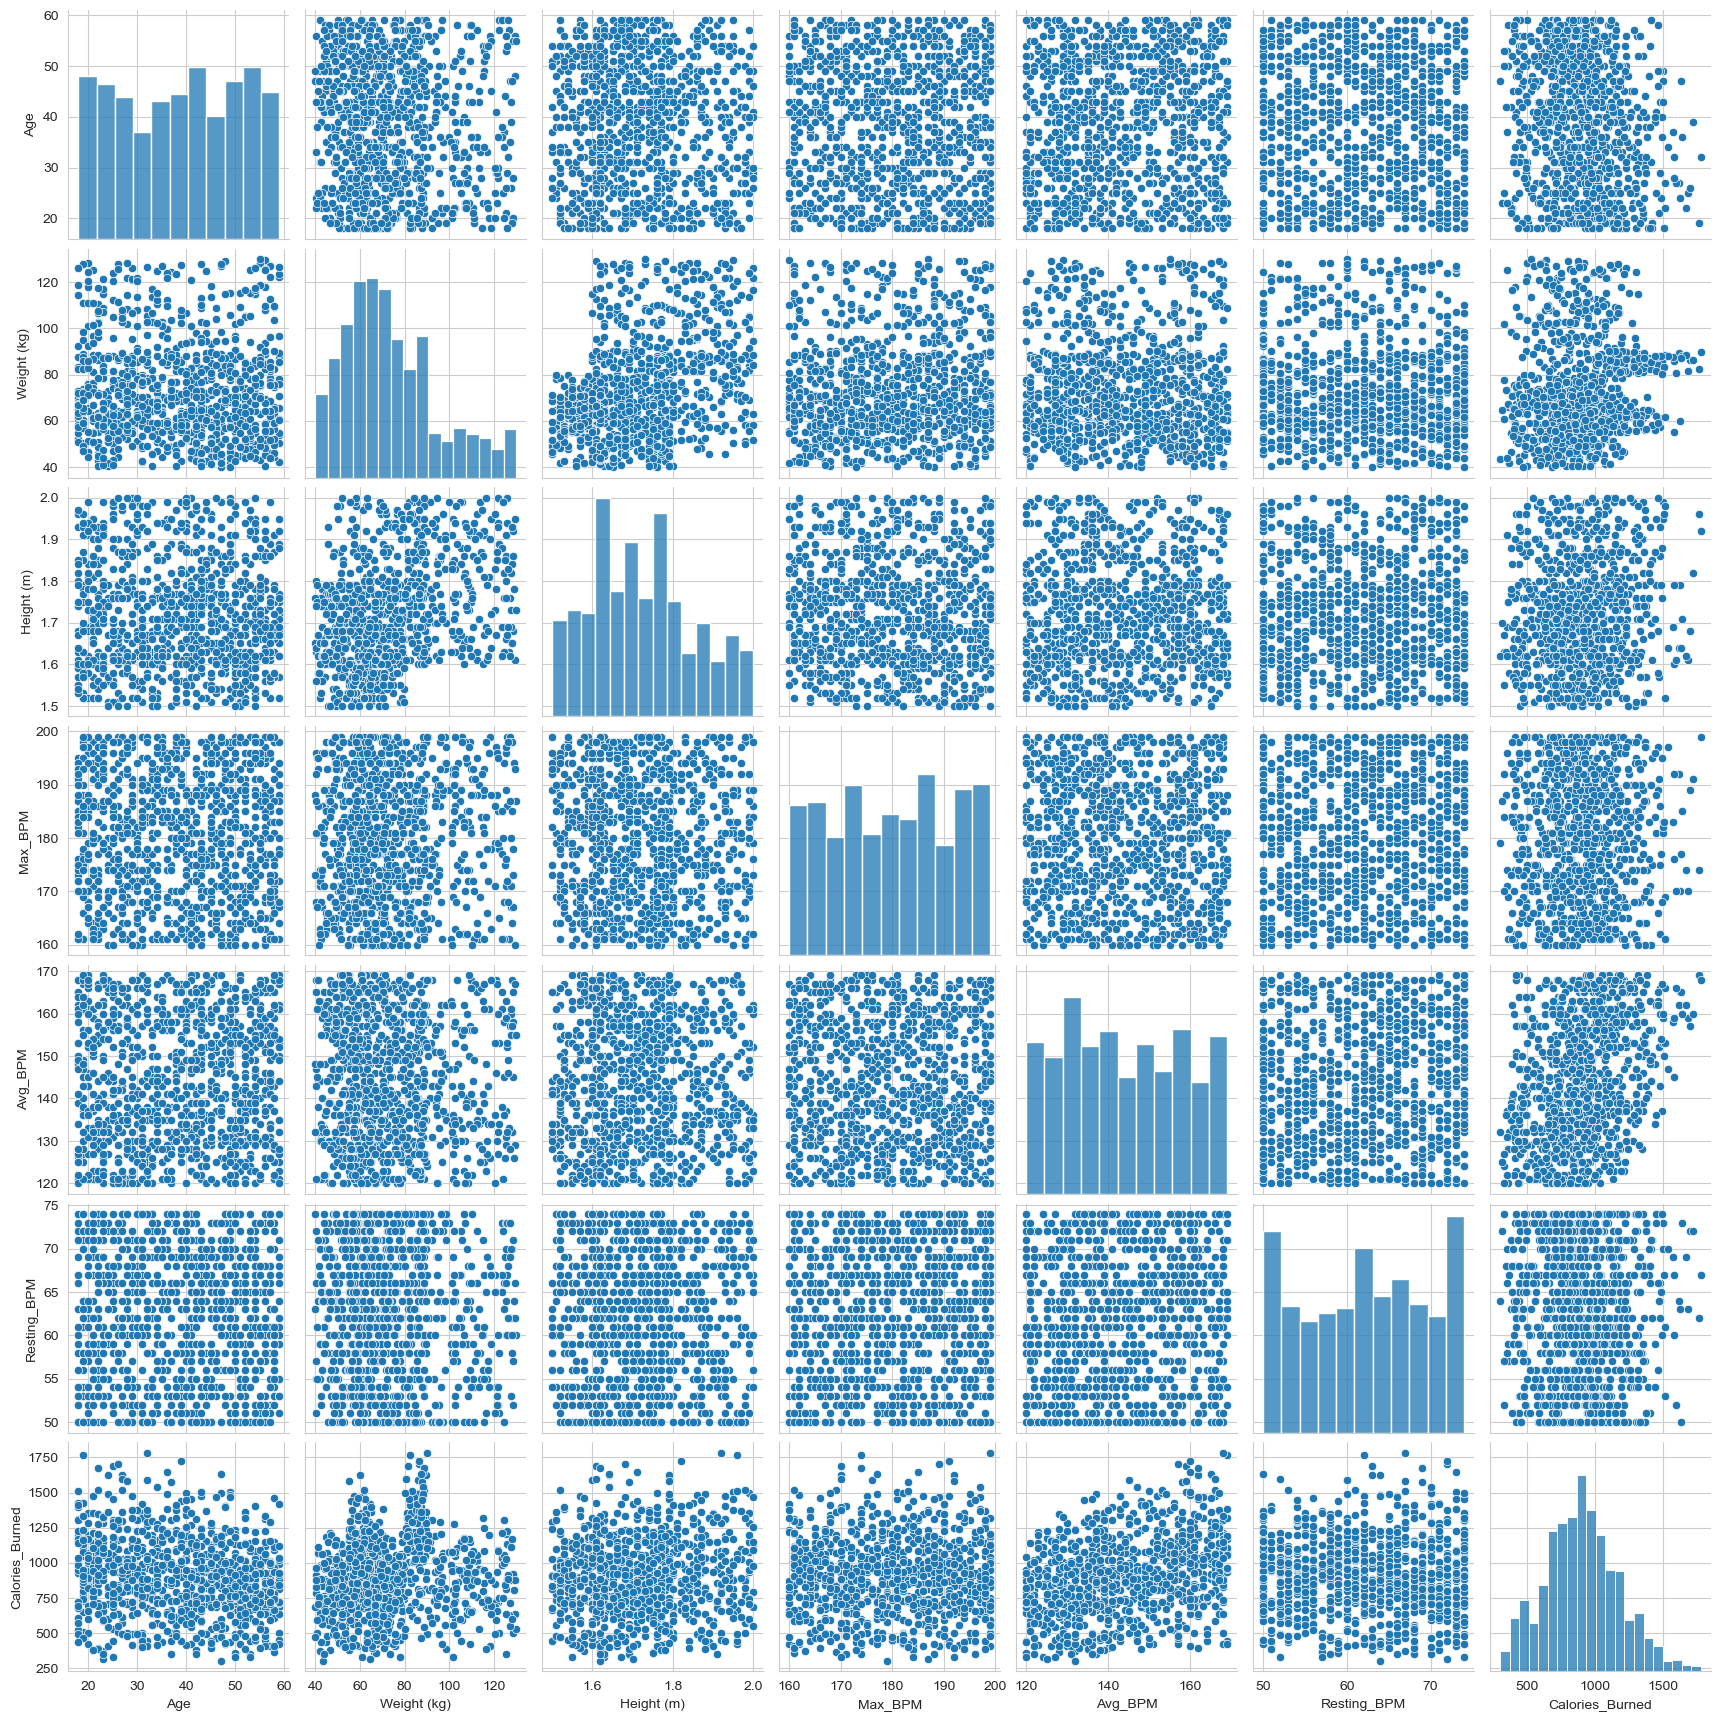

In [511]:
data1 = data[["Age", "Weight (kg)", "Height (m)", "Max_BPM", "Avg_BPM", "Resting_BPM", "Calories_Burned"]]
sns.set_style("whitegrid")
sns.pairplot(data1)
plt.show()

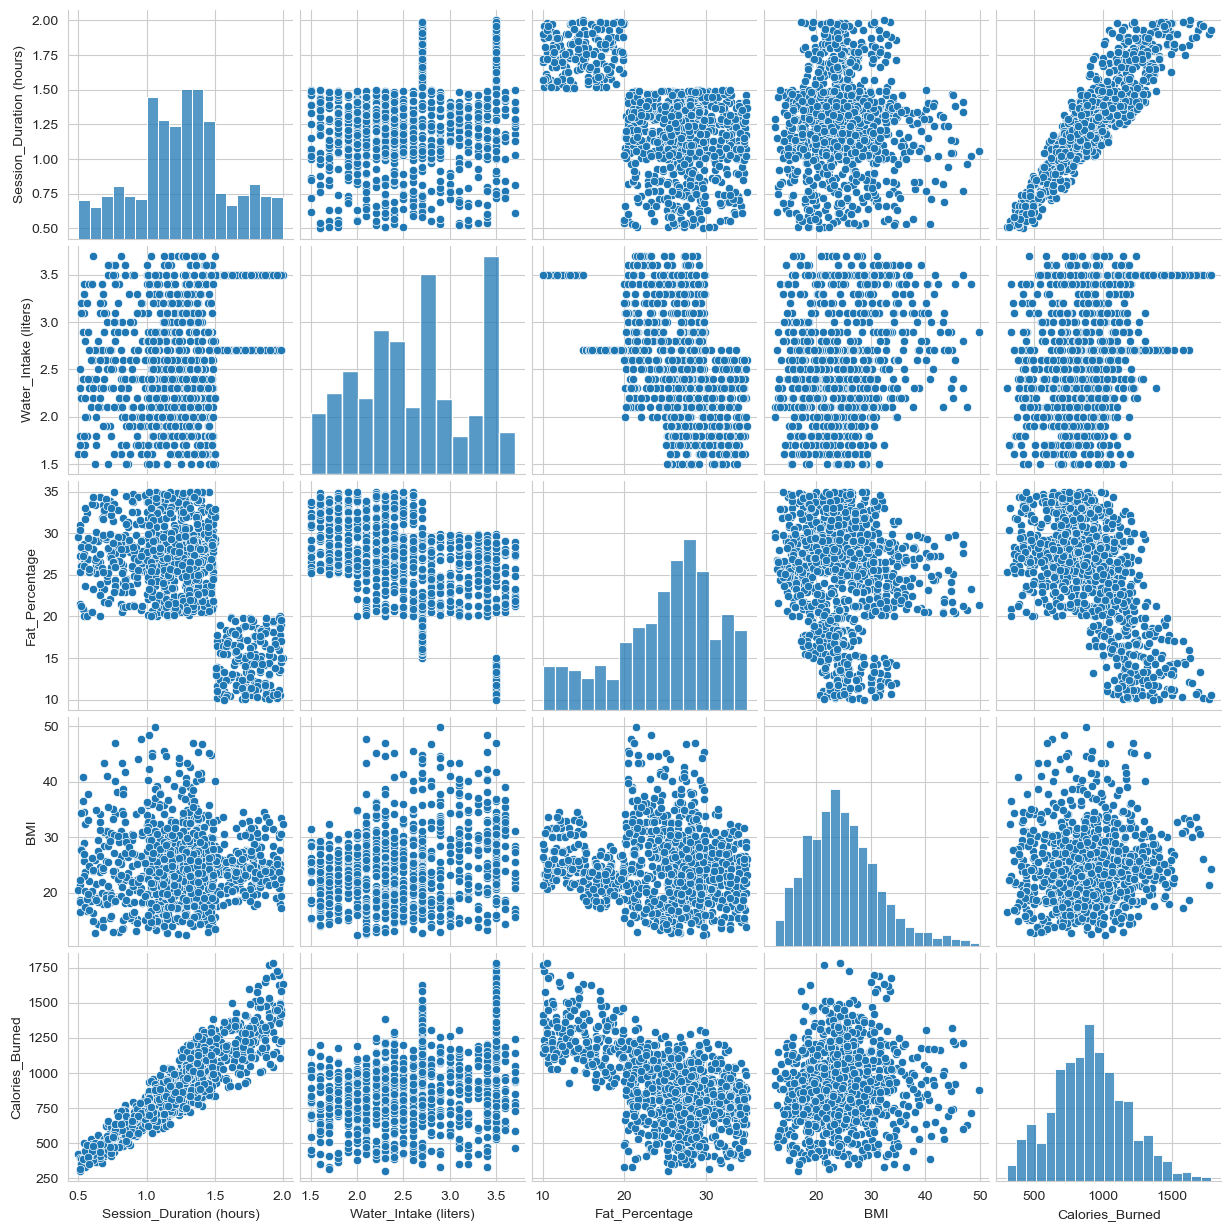

In [512]:
data2 = data[["Session_Duration (hours)", "Water_Intake (liters)", "Fat_Percentage", "BMI", "Calories_Burned"]]
sns.set_style("whitegrid")
sns.pairplot(data2)
plt.show()

In [513]:
data = data.rename(columns={
    "Weight (kg)": "Weight",
    "Height (m)": "Height",
    "Session_Duration (hours)": "Session_Duration",
    "Water_Intake (liters)": "Water_Intake",
    "Workout_Frequency (days/week)": "Workout_Frequency"
})
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male    88.3    1.71      180      157           60   
1     46  Female    74.9    1.53      179      151           66   
2     32  Female    68.1    1.66      167      122           54   
3     25    Male    53.2    1.70      190      164           56   
4     38    Male    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24    Male    87.1    1.74      187      158           67   
969   25    Male    66.6    1.61      184      166           56   
970   59  Female    60.4    1.76      194      120           53   
971   32    Male   126.4    1.83      198      146           62   
972   46    Male    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned Workout_Type  Fat_Percentage  \
0                1.69           1313.0         Yoga            12.6   
1                1.30            883.0         HIIT            33.9   
2                1.11            677.0       Cardio            33.4   
3                0.59            532.0     Strength            28.8   
4                0.64            556.0     Strength            29.2   
..                ...              ...          ...             ...   
968              1.57           1364.0     Strength            10.0   
969              1.38           1260.0     Strength            25.0   
970              1.72            929.0       Cardio            18.8   
971              1.10            883.0         HIIT            28.2   
972              0.75            542.0     Strength            28.8   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  
0             3.5                  4                 3  30.20  
1             2.1                  4                 2  32.00  
2             2.3                  4                 2  24.71  
3             2.1                  3                 1  18.41  
4             2.8                  3                 1  14.39  
..            ...                ...               ...    ...  
968           3.5                  4                 3  28.77  
969           3.0                  2                 1  25.69  
970           2.7                  5                 3  19.50  
971           2.1                  3                 2  37.74  
972           3.5                  2                 1  33.38  

[973 rows x 15 columns]

In [514]:
raw_data = data.copy(deep=True)
encoder = LabelEncoder()
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data["Workout_Type"] = encoder.fit_transform(data["Workout_Type"])
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       0    88.3    1.71      180      157           60   
1     46       1    74.9    1.53      179      151           66   
2     32       1    68.1    1.66      167      122           54   
3     25       0    53.2    1.70      190      164           56   
4     38       0    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       0    87.1    1.74      187      158           67   
969   25       0    66.6    1.61      184      166           56   
970   59       1    60.4    1.76      194      120           53   
971   32       0   126.4    1.83      198      146           62   
972   46       0    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  Fat_Percentage  \
0                1.69           1313.0             3            12.6   
1                1.30            883.0             1            33.9   
2                1.11            677.0             0            33.4   
3                0.59            532.0             2            28.8   
4                0.64            556.0             2            29.2   
..                ...              ...           ...             ...   
968              1.57           1364.0             2            10.0   
969              1.38           1260.0             2            25.0   
970              1.72            929.0             0            18.8   
971              1.10            883.0             1            28.2   
972              0.75            542.0             2            28.8   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  
0             3.5                  4                 3  30.20  
1             2.1                  4                 2  32.00  
2             2.3                  4                 2  24.71  
3             2.1                  3                 1  18.41  
4             2.8                  3                 1  14.39  
..            ...                ...               ...    ...  
968           3.5                  4                 3  28.77  
969           3.0                  2                 1  25.69  
970           2.7                  5                 3  19.50  
971           2.1                  3                 2  37.74  
972           3.5                  2                 1  33.38  

[973 rows x 15 columns]

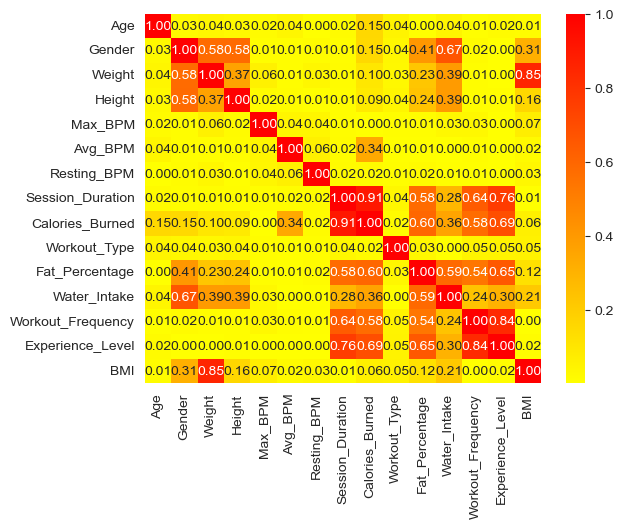

In [515]:
data_copy = data.copy(deep=True)
corr = data_copy.corr()
sns.heatmap(abs(corr), annot=True, cmap=plt.cm.autumn_r, fmt='.2f')
plt.show()

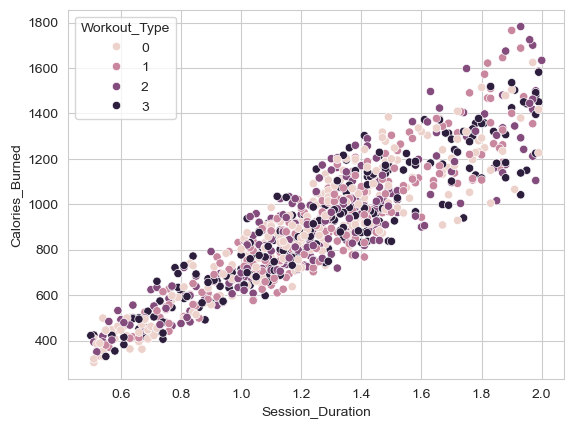

In [516]:
sns.scatterplot(data, x = "Session_Duration", y = "Calories_Burned", hue = "Workout_Type")
plt.show()

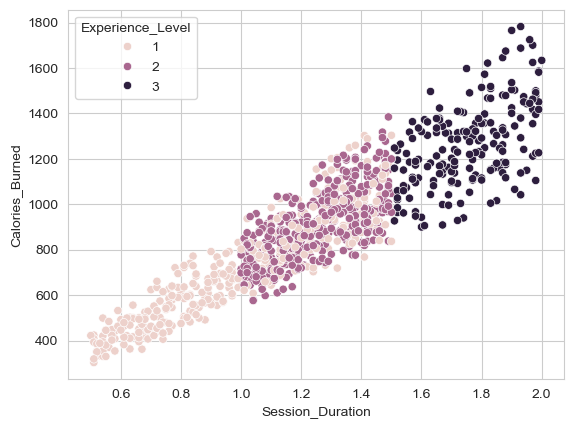

In [517]:
sns.scatterplot(data, x = "Session_Duration", y = "Calories_Burned", hue = "Experience_Level")
plt.show()

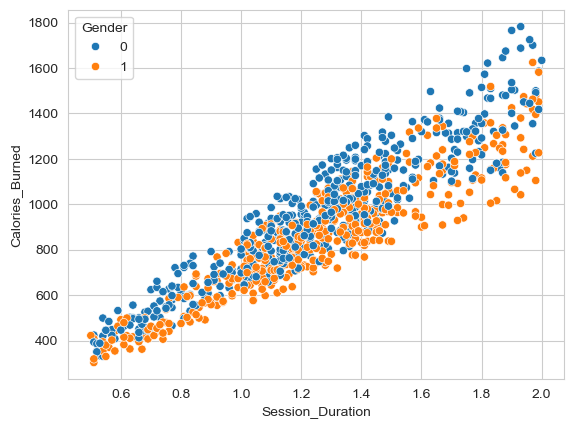

In [518]:
sns.scatterplot(data, x = "Session_Duration", y = "Calories_Burned", hue = "Gender")
plt.show()

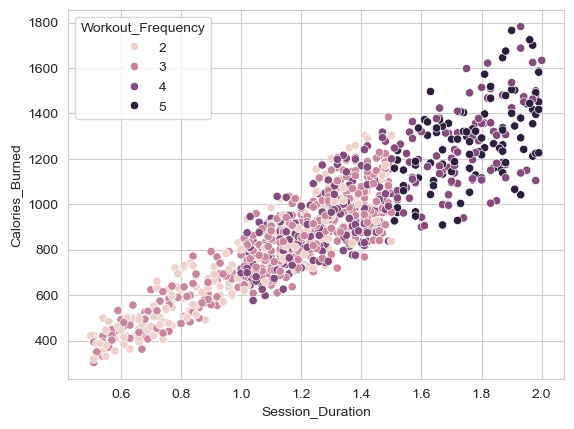

In [519]:
sns.scatterplot(data, x = "Session_Duration", y = "Calories_Burned", hue = "Workout_Frequency")
plt.show()

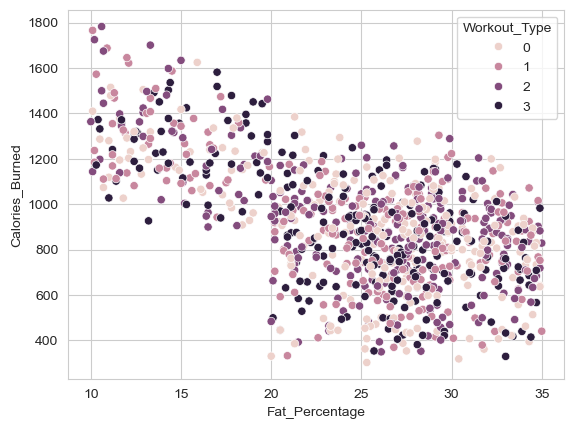

In [520]:
sns.scatterplot(data, x = "Fat_Percentage", y = "Calories_Burned", hue = "Workout_Type")
plt.show()

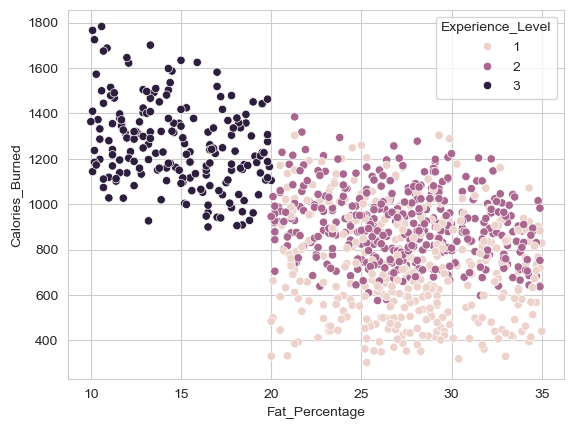

In [521]:
sns.scatterplot(data, x = "Fat_Percentage", y = "Calories_Burned", hue = "Experience_Level")
plt.show()

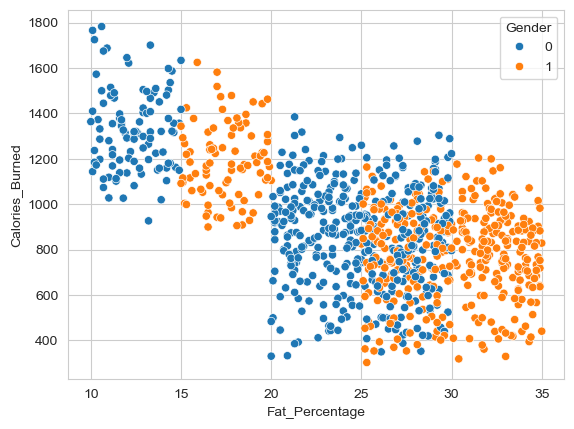

In [522]:
sns.scatterplot(data, x = "Fat_Percentage", y = "Calories_Burned", hue = "Gender")
plt.show()

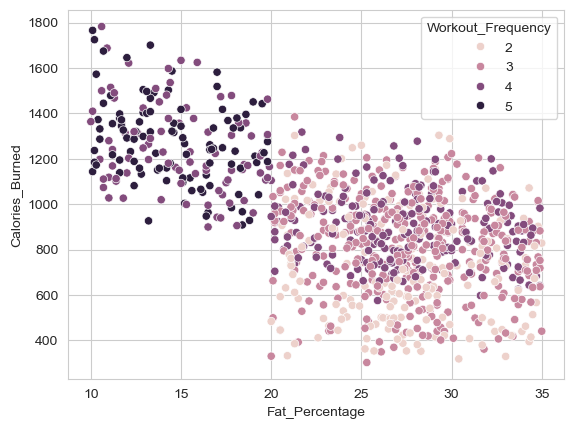

In [523]:
sns.scatterplot(data, x = "Fat_Percentage", y = "Calories_Burned", hue = "Workout_Frequency")
plt.show()

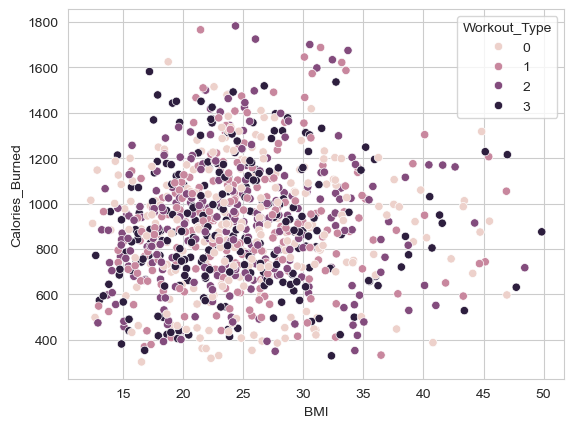

In [524]:
sns.scatterplot(data, x = "BMI", y = "Calories_Burned", hue = "Workout_Type")
plt.show()

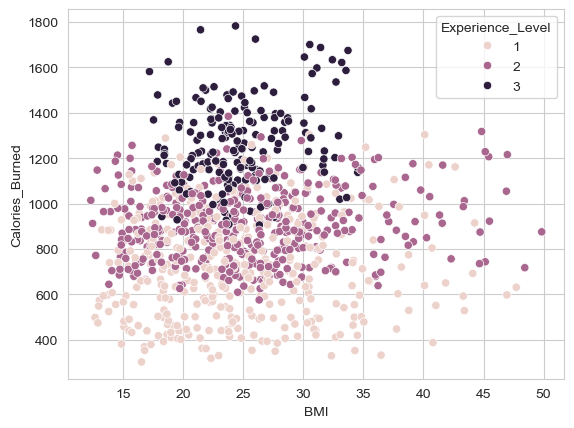

In [525]:
sns.scatterplot(data, x = "BMI", y = "Calories_Burned", hue = "Experience_Level")
plt.show()

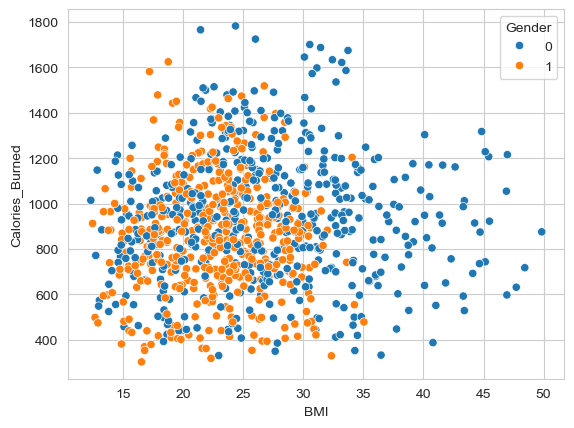

In [526]:
sns.scatterplot(data, x = "BMI", y = "Calories_Burned", hue = "Gender")
plt.show()

In [527]:
sns.scatterplot(data, x = "BMI", y = "Calories_Burned", hue = "Workout_Frequency")
plt.show()

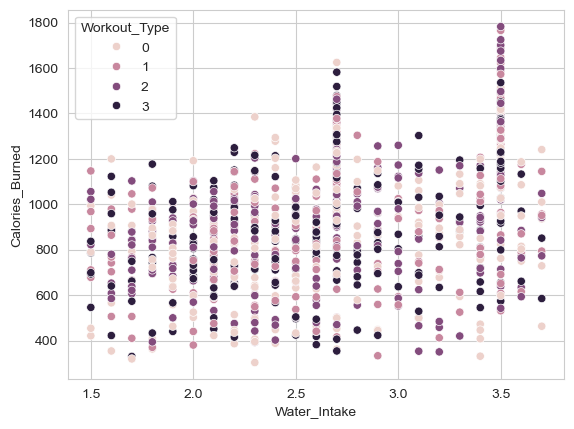

In [528]:
sns.scatterplot(data, x = "Water_Intake", y = "Calories_Burned", hue = "Workout_Type")
plt.show()

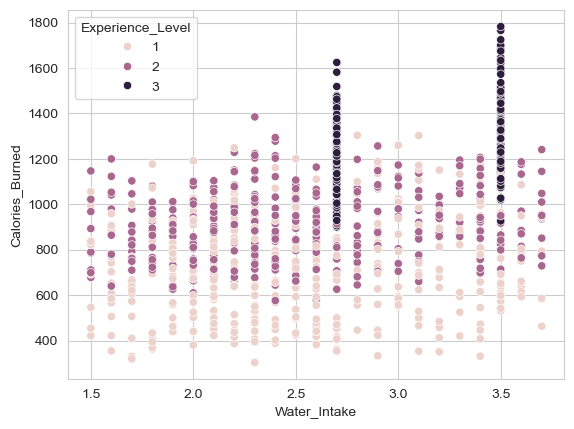

In [529]:
sns.scatterplot(data, x = "Water_Intake", y = "Calories_Burned", hue = "Experience_Level")
plt.show()

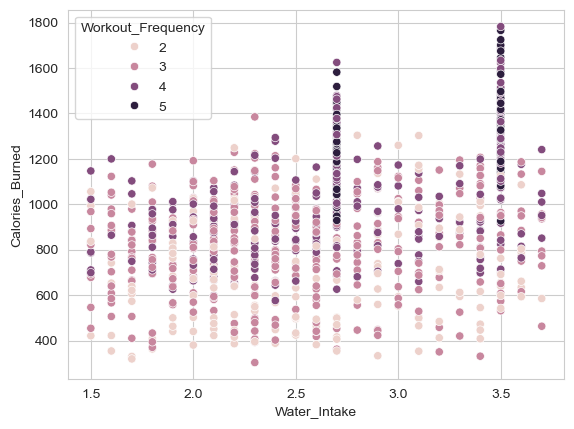

In [530]:
sns.scatterplot(data, x = "Water_Intake", y = "Calories_Burned", hue = "Workout_Frequency")
plt.show()

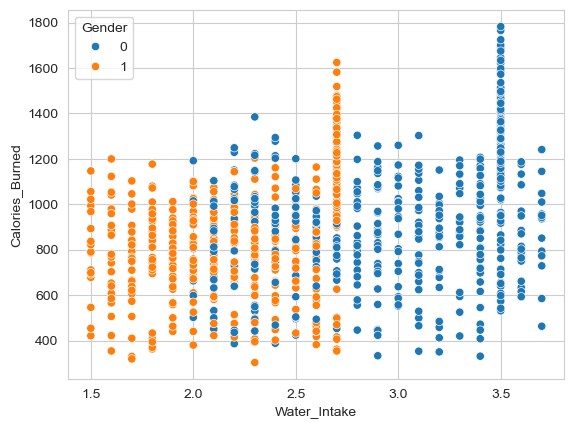

In [531]:
sns.scatterplot(data, x = "Water_Intake", y = "Calories_Burned", hue = "Gender")
plt.show()

In [532]:
def cross_validate_model_with_train_test(data, formula, string, n_splits=5):
    train_mse_scores, test_mse_scores = [], []
    train_rmse_scores, test_rmse_scores = [], []
    train_mae_scores, test_mae_scores = [], []
    train_r2_scores, test_r2_scores = [], []
    train_rse_scores, test_rse_scores = [], []

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        model = smf.ols(formula=formula, data=train_data).fit()

        train_predictions = model.predict(train_data)
        test_predictions = model.predict(test_data)

        if string == "Calories_Burned_SQRT":
            train_residuals = train_data[string]**2 - train_predictions**2
            test_residuals = test_data[string]**2 - test_predictions**2

            train_rss = np.sum(train_residuals ** 2)
            test_rss = np.sum(test_residuals ** 2)

            train_rse = np.sqrt(train_rss / (len(train_data) - model.df_model - 1))
            test_rse = np.sqrt(test_rss / (len(test_data) - model.df_model - 1))
        
            train_mse = mean_squared_error(train_data[string]**2, train_predictions**2)
            train_rmse = np.sqrt(train_mse)
            train_mae = mean_absolute_error(train_data[string]**2, train_predictions**2)
            train_r2 = r2_score(train_data[string]**2, train_predictions**2)

            test_mse = mean_squared_error(test_data[string]**2, test_predictions**2)
            test_rmse = np.sqrt(test_mse)
            test_mae = mean_absolute_error(test_data[string]**2, test_predictions**2)
            test_r2 = r2_score(test_data[string]**2, test_predictions**2)
        else:
            train_residuals = train_data[string] - train_predictions
            test_residuals = test_data[string] - test_predictions

            train_rss = np.sum(train_residuals ** 2)
            test_rss = np.sum(test_residuals ** 2)

            train_rse = np.sqrt(train_rss / (len(train_data) - model.df_model - 1))
            test_rse = np.sqrt(test_rss / (len(test_data) - model.df_model - 1))

            train_mse = mean_squared_error(train_data[string], train_predictions)
            train_rmse = np.sqrt(train_mse)
            train_mae = mean_absolute_error(train_data[string], train_predictions)
            train_r2 = r2_score(train_data[string], train_predictions)

            test_mse = mean_squared_error(test_data[string], test_predictions)
            test_rmse = np.sqrt(test_mse)
            test_mae = mean_absolute_error(test_data[string], test_predictions)
            test_r2 = r2_score(test_data[string], test_predictions)

        train_mse_scores.append(train_mse)
        test_mse_scores.append(test_mse)

        train_rmse_scores.append(train_rmse)
        test_rmse_scores.append(test_rmse)

        train_mae_scores.append(train_mae)
        test_mae_scores.append(test_mae)

        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)

        train_rse_scores.append(train_rse)
        test_rse_scores.append(test_rse)

    return {
        "Train_MSE": (np.mean(train_mse_scores), np.std(train_mse_scores)),
        "Test_MSE": (np.mean(test_mse_scores), np.std(test_mse_scores)),
        "Train_RMSE": (np.mean(train_rmse_scores), np.std(train_rmse_scores)),
        "Test_RMSE": (np.mean(test_rmse_scores), np.std(test_rmse_scores)),
        "Train_MAE": (np.mean(train_mae_scores), np.std(train_mae_scores)),
        "Test_MAE": (np.mean(test_mae_scores), np.std(test_mae_scores)),
        "Train_R2": (np.mean(train_r2_scores), np.std(train_r2_scores)),
        "Test_R2": (np.mean(test_r2_scores), np.std(test_r2_scores)),
        "Train_RSE": (np.mean(train_rse_scores), np.std(train_rse_scores)),
        "Test_RSE": (np.mean(test_rse_scores), np.std(test_rse_scores)),
    }


In [533]:
predictors = ["Session_Duration", "Fat_Percentage", "Experience_Level", "Workout_Frequency"]
X = data[predictors]

X = sm.add_constant(X)  

vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif_data = vif_data[vif_data["Feature"] != "const"]

print(vif_data)

             Feature       VIF
1   Session_Duration  2.478123
2     Fat_Percentage  1.800075
3   Experience_Level  5.228264
4  Workout_Frequency  3.344205


In [534]:
data["Fat_Percentage_Experience_Level"] = data["Fat_Percentage"] / data["Experience_Level"]

In [535]:
predictors = ["Session_Duration", "Fat_Percentage_Experience_Level", "Workout_Frequency"]
X = data[predictors]

X = sm.add_constant(X)  

vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif_data = vif_data[vif_data["Feature"] != "const"]

print(vif_data)

                           Feature       VIF
1                 Session_Duration  2.010969
2  Fat_Percentage_Experience_Level  3.115160
3                Workout_Frequency  2.787547


In [536]:
model0 = smf.ols(formula="Calories_Burned ~ Session_Duration + Workout_Frequency + Fat_Percentage_Experience_Level", data=data).fit()
data["Predicted"] = model0.predict()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1569.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:41:27   Log-Likelihood:                -5977.0
No. Observations:                 973   AIC:                         1.196e+04
Df Residuals:                     969   BIC:                         1.198e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [537]:
data["Residuals"] = data["Calories_Burned"] - data["Predicted"]
std_residuals = data["Residuals"].std()
data["Std_Residuals"] = data["Residuals"] / std_residuals
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       0    88.3    1.71      180      157           60   
1     46       1    74.9    1.53      179      151           66   
2     32       1    68.1    1.66      167      122           54   
3     25       0    53.2    1.70      190      164           56   
4     38       0    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       0    87.1    1.74      187      158           67   
969   25       0    66.6    1.61      184      166           56   
970   59       1    60.4    1.76      194      120           53   
971   32       0   126.4    1.83      198      146           62   
972   46       0    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  Fat_Percentage  \
0                1.69           1313.0             3            12.6   
1                1.30            883.0             1            33.9   
2                1.11            677.0             0            33.4   
3                0.59            532.0             2            28.8   
4                0.64            556.0             2            29.2   
..                ...              ...           ...             ...   
968              1.57           1364.0             2            10.0   
969              1.38           1260.0             2            25.0   
970              1.72            929.0             0            18.8   
971              1.10            883.0             1            28.2   
972              0.75            542.0             2            28.8   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  \
0             3.5                  4                 3  30.20   
1             2.1                  4                 2  32.00   
2             2.3                  4                 2  24.71   
3             2.1                  3                 1  18.41   
4             2.8                  3                 1  14.39   
..            ...                ...               ...    ...   
968           3.5                  4                 3  28.77   
969           3.0                  2                 1  25.69   
970           2.7                  5                 3  19.50   
971           2.1                  3                 2  37.74   
972           3.5                  2                 1  33.38   

     Fat_Percentage_Experience_Level    Predicted   Residuals  Std_Residuals  
0                           4.200000  1237.794097   75.205903       0.667537  
1                          16.950000   920.320176  -37.320176      -0.331259  
2                          16.700000   788.082182 -111.082182      -0.985980  
3                          28.800000   406.850622  125.149378       1.110842  
4                          29.200000   440.490008  115.509992       1.025282  
..                               ...          ...         ...            ...  
968                         3.333333  1156.735597  207.264403       1.839706  
969                        25.000000   998.539187  261.460813       2.320760  
970                         6.266667  1226.578643 -297.578643      -2.641347  
971                        14.100000   815.160035   67.839965       0.602156  
972                        28.800000   543.998198   -1.998198      -0.017736  

[973 rows x 19 columns]

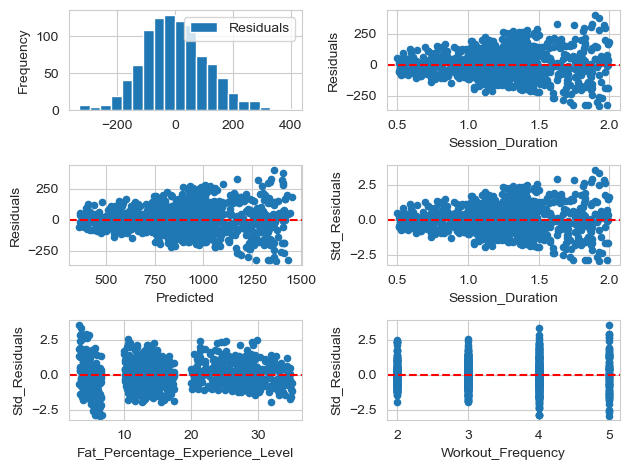

In [538]:
fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3,2)
data.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Session_Duration", y = "Std_Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Fat_Percentage_Experience_Level", y = "Std_Residuals", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Workout_Frequency", y = "Std_Residuals", kind = "scatter", ax = g6)
g6.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [539]:
formula = "Calories_Burned ~ Session_Duration + Workout_Frequency + Fat_Percentage_Experience_Level"
results = cross_validate_model_with_train_test(data, formula, "Calories_Burned")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 12669.9170, Std = 300.5943
Test_MSE: Mean = 12766.3398, Std = 1187.7734
Train_RMSE: Mean = 112.5527, Std = 1.3444
Test_RMSE: Mean = 112.8716, Std = 5.1321
Train_MAE: Mean = 88.7201, Std = 0.7622
Test_MAE: Mean = 89.0089, Std = 2.9928
Train_R2: Mean = 0.8294, Std = 0.0032
Test_R2: Mean = 0.8278, Std = 0.0125
Train_RSE: Mean = 112.8430, Std = 1.3478
Test_RSE: Mean = 114.0498, Std = 5.1846


In [540]:
data["Calories_Burned_SQRT"] = np.sqrt(data["Calories_Burned"])

In [541]:
model0 = smf.ols(formula="Calories_Burned_SQRT ~ Session_Duration + Workout_Frequency + Fat_Percentage_Experience_Level", data=data).fit()
data["Predicted"] = model0.predict()
print(model0.summary())

                             OLS Regression Results                             
Dep. Variable:     Calories_Burned_SQRT   R-squared:                       0.841
Model:                              OLS   Adj. R-squared:                  0.840
Method:                   Least Squares   F-statistic:                     1707.
Date:                  Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                          19:41:31   Log-Likelihood:                -1973.0
No. Observations:                   973   AIC:                             3954.
Df Residuals:                       969   BIC:                             3973.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [542]:
data["Residuals"] = data["Calories_Burned_SQRT"] - data["Predicted"]
std_residuals = data["Residuals"].std()
data["Std_Residuals"] = data["Residuals"] / std_residuals
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       0    88.3    1.71      180      157           60   
1     46       1    74.9    1.53      179      151           66   
2     32       1    68.1    1.66      167      122           54   
3     25       0    53.2    1.70      190      164           56   
4     38       0    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       0    87.1    1.74      187      158           67   
969   25       0    66.6    1.61      184      166           56   
970   59       1    60.4    1.76      194      120           53   
971   32       0   126.4    1.83      198      146           62   
972   46       0    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  Fat_Percentage  \
0                1.69           1313.0             3            12.6   
1                1.30            883.0             1            33.9   
2                1.11            677.0             0            33.4   
3                0.59            532.0             2            28.8   
4                0.64            556.0             2            29.2   
..                ...              ...           ...             ...   
968              1.57           1364.0             2            10.0   
969              1.38           1260.0             2            25.0   
970              1.72            929.0             0            18.8   
971              1.10            883.0             1            28.2   
972              0.75            542.0             2            28.8   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  \
0             3.5                  4                 3  30.20   
1             2.1                  4                 2  32.00   
2             2.3                  4                 2  24.71   
3             2.1                  3                 1  18.41   
4             2.8                  3                 1  14.39   
..            ...                ...               ...    ...   
968           3.5                  4                 3  28.77   
969           3.0                  2                 1  25.69   
970           2.7                  5                 3  19.50   
971           2.1                  3                 2  37.74   
972           3.5                  2                 1  33.38   

     Fat_Percentage_Experience_Level  Predicted  Residuals  Std_Residuals  \
0                           4.200000  35.386985   0.848357       0.461290   
1                          16.950000  29.944699  -0.229383      -0.124726   
2                          16.700000  27.658367  -1.639143      -0.891275   
3                          28.800000  21.180588   1.884537       1.024707   
4                          29.200000  21.763374   1.816279       0.987592   
..                               ...        ...        ...            ...   
968                         3.333333  33.983027   2.949344       1.603690   
969                        25.000000  31.462099   4.034379       2.193672   
970                         6.266667  35.131679  -4.652178      -2.529597   
971                        14.100000  28.185956   1.529360       0.831581   
972                        28.800000  23.619595  -0.338702      -0.184167   

     Calories_Burned_SQRT  
0               36.235342  
1               29.715316  
2               26.019224  
3               23.065125  
4               23.579652  
..                    ...  
968             36.932371  
969             35.496479  
970             30.479501  
971             29.715316  
972             23.280893  

[973 rows x 20 columns]

In [543]:
fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3,2)
data.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Session_Duration", y = "Std_Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Fat_Percentage_Experience_Level", y = "Std_Residuals", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Workout_Frequency", y = "Std_Residuals", kind = "scatter", ax = g6)
g6.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [544]:
formula = "Calories_Burned_SQRT ~ Session_Duration + + Workout_Frequency + Fat_Percentage_Experience_Level"
results = cross_validate_model_with_train_test(data, formula, "Calories_Burned_SQRT")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 13255.9994, Std = 364.3689
Test_MSE: Mean = 13354.8697, Std = 1437.1450
Train_RMSE: Mean = 115.1236, Std = 1.5954
Test_RMSE: Mean = 115.4059, Std = 6.0286
Train_MAE: Mean = 90.1770, Std = 0.9314
Test_MAE: Mean = 90.4679, Std = 3.7030
Train_R2: Mean = 0.8215, Std = 0.0041
Test_R2: Mean = 0.8199, Std = 0.0146
Train_RSE: Mean = 115.4206, Std = 1.5994
Test_RSE: Mean = 116.6105, Std = 6.0901


In [545]:
model0 = smf.ols(formula="Calories_Burned_SQRT ~ Session_Duration + I(Session_Duration**2) + Workout_Frequency + Fat_Percentage_Experience_Level", data=data).fit()
data["Predicted"] = model0.predict()
print(model0.summary())

                             OLS Regression Results                             
Dep. Variable:     Calories_Burned_SQRT   R-squared:                       0.849
Model:                              OLS   Adj. R-squared:                  0.849
Method:                   Least Squares   F-statistic:                     1364.
Date:                  Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                          19:41:35   Log-Likelihood:                -1946.7
No. Observations:                   973   AIC:                             3903.
Df Residuals:                       968   BIC:                             3928.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [546]:
data["Residuals"] = data["Calories_Burned_SQRT"] - data["Predicted"]
std_residuals = data["Residuals"].std()
data["Std_Residuals"] = data["Residuals"] / std_residuals
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       0    88.3    1.71      180      157           60   
1     46       1    74.9    1.53      179      151           66   
2     32       1    68.1    1.66      167      122           54   
3     25       0    53.2    1.70      190      164           56   
4     38       0    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       0    87.1    1.74      187      158           67   
969   25       0    66.6    1.61      184      166           56   
970   59       1    60.4    1.76      194      120           53   
971   32       0   126.4    1.83      198      146           62   
972   46       0    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  Fat_Percentage  \
0                1.69           1313.0             3            12.6   
1                1.30            883.0             1            33.9   
2                1.11            677.0             0            33.4   
3                0.59            532.0             2            28.8   
4                0.64            556.0             2            29.2   
..                ...              ...           ...             ...   
968              1.57           1364.0             2            10.0   
969              1.38           1260.0             2            25.0   
970              1.72            929.0             0            18.8   
971              1.10            883.0             1            28.2   
972              0.75            542.0             2            28.8   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  \
0             3.5                  4                 3  30.20   
1             2.1                  4                 2  32.00   
2             2.3                  4                 2  24.71   
3             2.1                  3                 1  18.41   
4             2.8                  3                 1  14.39   
..            ...                ...               ...    ...   
968           3.5                  4                 3  28.77   
969           3.0                  2                 1  25.69   
970           2.7                  5                 3  19.50   
971           2.1                  3                 2  37.74   
972           3.5                  2                 1  33.38   

     Fat_Percentage_Experience_Level  Predicted  Residuals  Std_Residuals  \
0                           4.200000  35.197698   1.037644       0.579627   
1                          16.950000  30.333550  -0.618234      -0.345345   
2                          16.700000  28.024012  -2.004788      -1.119874   
3                          28.800000  20.320109   2.745016       1.533365   
4                          29.200000  21.076003   2.503650       1.398538   
..                               ...        ...        ...            ...   
968                         3.333333  34.069354   2.863016       1.599280   
969                        25.000000  31.590654   3.905824       2.181792   
970                         6.266667  34.958066  -4.478565      -2.501725   
971                        14.100000  28.448250   1.267066       0.707782   
972                        28.800000  23.165089   0.115804       0.064688   

     Calories_Burned_SQRT  
0               36.235342  
1               29.715316  
2               26.019224  
3               23.065125  
4               23.579652  
..                    ...  
968             36.932371  
969             35.496479  
970             30.479501  
971             29.715316  
972             23.280893  

[973 rows x 20 columns]

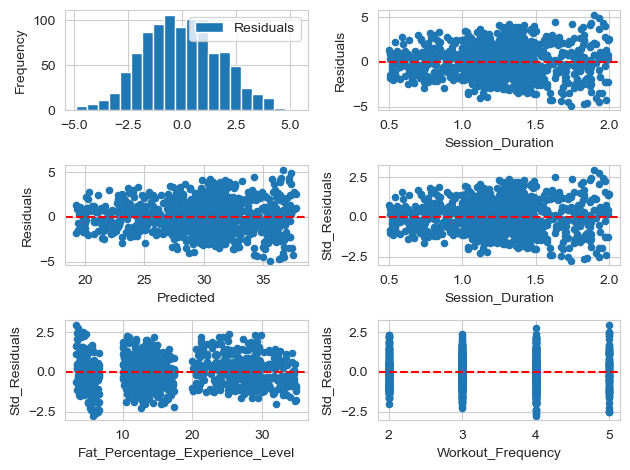

In [547]:
fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3,2)
data.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Session_Duration", y = "Std_Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Fat_Percentage_Experience_Level", y = "Std_Residuals", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Workout_Frequency", y = "Std_Residuals", kind = "scatter", ax = g6)
g6.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [548]:
formula = "Calories_Burned_SQRT ~ Session_Duration + I(Session_Duration**2) + Workout_Frequency + Fat_Percentage_Experience_Level"
results = cross_validate_model_with_train_test(data, formula, "Calories_Burned_SQRT")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 12661.9424, Std = 290.1771
Test_MSE: Mean = 12807.3282, Std = 1153.2870
Train_RMSE: Mean = 112.5178, Std = 1.2980
Test_RMSE: Mean = 113.0598, Std = 4.9801
Train_MAE: Mean = 88.6969, Std = 0.7306
Test_MAE: Mean = 89.2356, Std = 2.8515
Train_R2: Mean = 0.8295, Std = 0.0029
Test_R2: Mean = 0.8272, Std = 0.0115
Train_RSE: Mean = 112.8809, Std = 1.3021
Test_RSE: Mean = 114.5409, Std = 5.0440


In [549]:
model1 = smf.ols(formula="Calories_Burned ~ Session_Duration * Gender", data=data).fit()
data["Predicted"] = model1.predict()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1902.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:41:41   Log-Likelihood:                -5898.1
No. Observations:                 973   AIC:                         1.180e+04
Df Residuals:                     969   BIC:                         1.182e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [550]:
data["Residuals"] = data["Calories_Burned"] - data["Predicted"]
std_residuals = data["Residuals"].std()
data["Std_Residuals"] = data["Residuals"] / std_residuals
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       0    88.3    1.71      180      157           60   
1     46       1    74.9    1.53      179      151           66   
2     32       1    68.1    1.66      167      122           54   
3     25       0    53.2    1.70      190      164           56   
4     38       0    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       0    87.1    1.74      187      158           67   
969   25       0    66.6    1.61      184      166           56   
970   59       1    60.4    1.76      194      120           53   
971   32       0   126.4    1.83      198      146           62   
972   46       0    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  Fat_Percentage  \
0                1.69           1313.0             3            12.6   
1                1.30            883.0             1            33.9   
2                1.11            677.0             0            33.4   
3                0.59            532.0             2            28.8   
4                0.64            556.0             2            29.2   
..                ...              ...           ...             ...   
968              1.57           1364.0             2            10.0   
969              1.38           1260.0             2            25.0   
970              1.72            929.0             0            18.8   
971              1.10            883.0             1            28.2   
972              0.75            542.0             2            28.8   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  \
0             3.5                  4                 3  30.20   
1             2.1                  4                 2  32.00   
2             2.3                  4                 2  24.71   
3             2.1                  3                 1  18.41   
4             2.8                  3                 1  14.39   
..            ...                ...               ...    ...   
968           3.5                  4                 3  28.77   
969           3.0                  2                 1  25.69   
970           2.7                  5                 3  19.50   
971           2.1                  3                 2  37.74   
972           3.5                  2                 1  33.38   

     Fat_Percentage_Experience_Level    Predicted   Residuals  Std_Residuals  \
0                           4.200000  1281.555515   31.444485       0.302680   
1                          16.950000   888.520202   -5.520202      -0.053137   
2                          16.700000   761.111729  -84.111729      -0.809648   
3                          28.800000   434.095185   97.904815       0.942418   
4                          29.200000   472.616110   83.383890       0.802642   
..                               ...          ...         ...            ...   
968                         3.333333  1189.105297  174.894703       1.683513   
969                        25.000000  1042.725786  217.274214       2.091452   
970                         6.266667  1170.159985 -241.159985      -2.321373   
971                        14.100000   827.008611   55.991389       0.538965   
972                        28.800000   557.362143  -15.362143      -0.147874   

     Calories_Burned_SQRT  
0               36.235342  
1               29.715316  
2               26.019224  
3               23.065125  
4               23.579652  
..                    ...  
968             36.932371  
969             35.496479  
970             30.479501  
971             29.715316  
972             23.280893  

[973 rows x 20 columns]

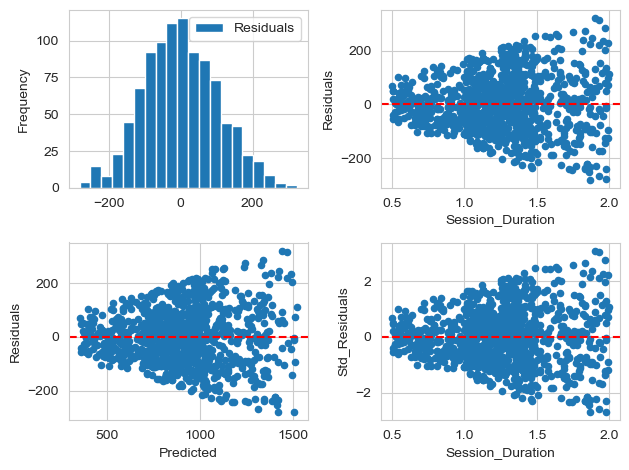

In [551]:
fig, ((g1, g2), (g3, g4)) = plt.subplots(2,2)
data.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Session_Duration", y = "Std_Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [552]:
formula = "Calories_Burned ~ Session_Duration * Gender"
results = cross_validate_model_with_train_test(data, formula, "Calories_Burned")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 10771.9532, Std = 250.5913
Test_MSE: Mean = 10865.1559, Std = 988.9522
Train_RMSE: Mean = 103.7809, Std = 1.2176
Test_RMSE: Mean = 104.1344, Std = 4.6023
Train_MAE: Mean = 82.9317, Std = 0.7506
Test_MAE: Mean = 83.2888, Std = 2.8169
Train_R2: Mean = 0.8549, Std = 0.0023
Test_R2: Mean = 0.8535, Std = 0.0087
Train_RSE: Mean = 104.0486, Std = 1.2207
Test_RSE: Mean = 105.2214, Std = 4.6493


In [553]:
model2 = smf.ols(formula="Calories_Burned_SQRT ~ Session_Duration * Gender", data=data).fit()
data["Predicted_SQRT"] = model2.predict()
print(model2.summary())

                             OLS Regression Results                             
Dep. Variable:     Calories_Burned_SQRT   R-squared:                       0.862
Model:                              OLS   Adj. R-squared:                  0.861
Method:                   Least Squares   F-statistic:                     2014.
Date:                  Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                          19:41:44   Log-Likelihood:                -1904.5
No. Observations:                   973   AIC:                             3817.
Df Residuals:                       969   BIC:                             3837.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Interc

In [554]:
data["Residuals_SQRT"] = data["Calories_Burned_SQRT"] - data["Predicted_SQRT"]
std_residuals = data["Residuals_SQRT"].std()
data["Std_Residuals_SQRT"] = data["Residuals_SQRT"] / std_residuals
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       0    88.3    1.71      180      157           60   
1     46       1    74.9    1.53      179      151           66   
2     32       1    68.1    1.66      167      122           54   
3     25       0    53.2    1.70      190      164           56   
4     38       0    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       0    87.1    1.74      187      158           67   
969   25       0    66.6    1.61      184      166           56   
970   59       1    60.4    1.76      194      120           53   
971   32       0   126.4    1.83      198      146           62   
972   46       0    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  ...  Experience_Level  \
0                1.69           1313.0             3  ...                 3   
1                1.30            883.0             1  ...                 2   
2                1.11            677.0             0  ...                 2   
3                0.59            532.0             2  ...                 1   
4                0.64            556.0             2  ...                 1   
..                ...              ...           ...  ...               ...   
968              1.57           1364.0             2  ...                 3   
969              1.38           1260.0             2  ...                 1   
970              1.72            929.0             0  ...                 3   
971              1.10            883.0             1  ...                 2   
972              0.75            542.0             2  ...                 1   

       BMI  Fat_Percentage_Experience_Level    Predicted   Residuals  \
0    30.20                         4.200000  1281.555515   31.444485   
1    32.00                        16.950000   888.520202   -5.520202   
2    24.71                        16.700000   761.111729  -84.111729   
3    18.41                        28.800000   434.095185   97.904815   
4    14.39                        29.200000   472.616110   83.383890   
..     ...                              ...          ...         ...   
968  28.77                         3.333333  1189.105297  174.894703   
969  25.69                        25.000000  1042.725786  217.274214   
970  19.50                         6.266667  1170.159985 -241.159985   
971  37.74                        14.100000   827.008611   55.991389   
972  33.38                        28.800000   557.362143  -15.362143   

     Std_Residuals  Calories_Burned_SQRT  Predicted_SQRT  Residuals_SQRT  \
0         0.302680             36.235342       35.980612        0.254729   
1        -0.053137             29.715316       29.499616        0.215700   
2        -0.809648             26.019224       27.269943       -1.250719   
3         0.942418             23.065125       21.860224        1.204902   
4         0.802642             23.579652       22.502059        1.077593   
..             ...                   ...             ...             ...   
968       1.683513             36.932371       34.440206        2.492164   
969       2.091452             35.496479       32.001230        3.495249   
970      -2.321373             30.479501       34.428367       -3.948865   
971       0.538965             29.715316       28.406949        1.308367   
972      -0.147874             23.280893       23.914098       -0.633205   

     Std_Residuals_SQRT  
0              0.148599  
1              0.125830  
2             -0.729618  
3              0.702890  
4              0.628623  
..                  ...  
968            1.453825  
969            2.038983  
970           -2.303604  
971            0.763247  
972           -0.369385  

[973 rows x 23 columns]

In [555]:
fig, ((g1, g2), (g3, g4)) = plt.subplots(2,2)
data.plot(y = "Residuals_SQRT", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Session_Duration", y = "Residuals_SQRT", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Predicted_SQRT", y = "Residuals_SQRT", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Session_Duration", y = "Std_Residuals_SQRT", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [556]:
formula = "Calories_Burned_SQRT ~ Session_Duration * Gender"
results = cross_validate_model_with_train_test(data, formula, "Calories_Burned_SQRT")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 11369.2446, Std = 337.9144
Test_MSE: Mean = 11477.7637, Std = 1392.2348
Train_RMSE: Mean = 106.6147, Std = 1.5991
Test_RMSE: Mean = 106.9501, Std = 6.2800
Train_MAE: Mean = 84.7146, Std = 0.9314
Test_MAE: Mean = 85.0907, Std = 3.6070
Train_R2: Mean = 0.8469, Std = 0.0035
Test_R2: Mean = 0.8454, Std = 0.0130
Train_RSE: Mean = 106.8897, Std = 1.6031
Test_RSE: Mean = 108.0665, Std = 6.3440


In [557]:
columns_to_scale = ["Session_Duration", "Fat_Percentage", "Avg_BPM", "Water_Intake", "Age", "Max_BPM", "Resting_BPM", "Weight"
                    , "Height", "BMI"]
data.loc[:, columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
data_copy.loc[:, columns_to_scale] = scaler.fit_transform(data_copy[columns_to_scale])

C:\Users\Luka\AppData\Local\Temp\ipykernel_13852\3219687231.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.92297044  0.50449409 -1.51814158  1.41119284  0.9927165   0.85322438
  1.75992313 -0.19296648 -1.16941129 -0.54169677  0.15576381  0.57424015
  1.4809389  -0.54169677  1.20195467 -0.89042706  1.62043102  1.4809389
  0.15576381  1.62043102 -1.16941129 -0.12322042  1.20195467  1.69017707
  0.29525592  1.75992313 -0.3324586  -0.61144283 -0.54169677 -0.61144283
 -0.40220465 -1.16941129  0.92297044  0.92297044  0.29525592  1.13220861
  0.78347832  0.08601775  0.43474804  1.34144678 -0.89042706 -0.54169677
 -0.68118889 -1.09966523  0.9927165   1.20195467  1.62043102 -0.89042706
  0.50449409  0.01627169  0.9927165  -0.47195071 -0.68118889  0.50449409
 -1.3089034   1.34144678  1.27170073  0.71373227  0.64398621  0.92297044
 -1.37864946 -0.47195071 -0.61144283 -1.16941129  0.01627169  0.50449409
  0.08601775 -

In [558]:
dataX = data[["Session_Duration", "Fat_Percentage", "Experience_Level", "Workout_Frequency"]]
dataX

Session_Duration  Fat_Percentage  Experience_Level  Workout_Frequency
0            1.264598       -1.978321                 3                  4
1            0.127098        1.426301                 2                  4
2           -0.427068        1.346380                 2                  4
3           -1.943735        0.611110                 1                  3
4           -1.797902        0.675047                 1                  3
..                ...             ...               ...                ...
968          0.914598       -2.393908                 3                  4
969          0.360432        0.003713                 1                  2
970          1.352098       -0.987304                 3                  5
971         -0.456235        0.515205                 2                  3
972         -1.477068        0.611110                 1                  2

[973 rows x 4 columns]

In [559]:
dataY = data["Calories_Burned"]
dataY

0      1313.0
1       883.0
2       677.0
3       532.0
4       556.0
        ...  
968    1364.0
969    1260.0
970     929.0
971     883.0
972     542.0
Name: Calories_Burned, Length: 973, dtype: float64

In [560]:
pca = PCA(n_components=4)
pca_4 = pca.fit_transform(dataX)

var = pca.explained_variance_ratio_

fig, ax = plt.subplots()
ax.plot(range(1, len(var) + 1), var * 100, marker='o', linestyle='--')
ax.set_title('Explained Variance by Principal Components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance (%)')
plt.show()


In [561]:
dataX = pd.DataFrame(data = pca_4 , columns = ["PC1", "PC2", "PC3", "PC4"])
new_data = pd.concat([dataX, dataY], axis = 1)
new_data

PC1       PC2       PC3       PC4  Calories_Burned
0    2.565440 -0.831850  0.174721  0.292413           1313.0
1   -0.247599  1.559046 -0.234077 -0.005357            883.0
2   -0.513796  1.334594 -0.661771  0.091214            677.0
3   -1.899279 -0.304226 -1.092488 -0.132590            532.0
4   -1.851305 -0.208840 -0.976218 -0.153481            556.0
..        ...       ...       ...       ...              ...
968  2.585195 -1.282680 -0.127055  0.314918           1364.0
969 -0.801386 -0.584413  1.229232 -0.194657           1260.0
970  2.596481  0.449783 -0.297805 -0.058221            929.0
971 -0.594738  0.204774 -0.131098  0.447646            883.0
972 -2.132955 -0.590154 -0.113282  0.217514            542.0

[973 rows x 5 columns]

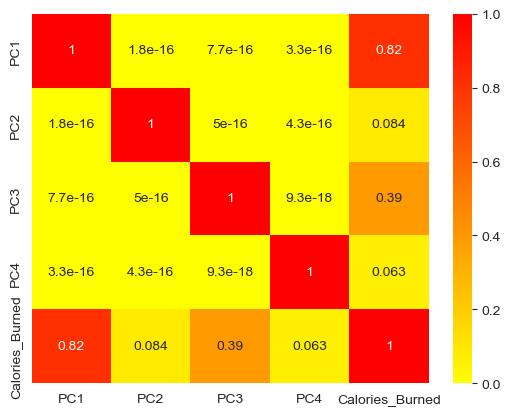

In [562]:
corr_matrix = new_data.corr()
sns.heatmap(abs(corr_matrix), annot=True, cmap=plt.cm.autumn_r)
plt.show()

In [563]:
data = pd.concat([data, dataX], axis = 1)
data

Age  Gender    Weight    Height   Max_BPM   Avg_BPM  Resting_BPM  \
0    1.422343       0  0.681493 -0.098545  0.010081  0.922970    -0.303555   
1    0.600965       1  0.049316 -1.508604 -0.076726  0.504494     0.515749   
2   -0.548964       1 -0.271491 -0.490228 -1.118414 -1.518142    -1.122858   
3   -1.123928       0 -0.974433 -0.176881  0.878155  1.411193    -0.849757   
4   -0.056137       0 -1.309393  0.528148  0.704540  0.992716     0.788850   
..        ...     ...       ...       ...       ...       ...          ...   
968 -1.206066       0  0.624880  0.136465  0.617733  0.992716     0.652299   
969 -1.123928       0 -0.342257 -0.881911  0.357311  1.550685    -0.849757   
970  1.668756       1 -0.634756  0.293138  1.225384 -1.657634    -1.259409   
971 -0.548964       0  2.478951  0.841495  1.572614  0.155764    -0.030454   
972  0.600965       0  0.700363 -0.725238 -1.205221  0.155764     0.515749   

     Session_Duration  Calories_Burned  Workout_Type  ...   Residuals  \
0            1.264598           1313.0             3  ...   31.444485   
1            0.127098            883.0             1  ...   -5.520202   
2           -0.427068            677.0             0  ...  -84.111729   
3           -1.943735            532.0             2  ...   97.904815   
4           -1.797902            556.0             2  ...   83.383890   
..                ...              ...           ...  ...         ...   
968          0.914598           1364.0             2  ...  174.894703   
969          0.360432           1260.0             2  ...  217.274214   
970          1.352098            929.0             0  ... -241.159985   
971         -0.456235            883.0             1  ...   55.991389   
972         -1.477068            542.0             2  ...  -15.362143   

     Std_Residuals  Calories_Burned_SQRT  Predicted_SQRT  Residuals_SQRT  \
0         0.302680             36.235342       35.980612        0.254729   
1        -0.053137             29.715316       29.499616        0.215700   
2        -0.809648             26.019224       27.269943       -1.250719   
3         0.942418             23.065125       21.860224        1.204902   
4         0.802642             23.579652       22.502059        1.077593   
..             ...                   ...             ...             ...   
968       1.683513             36.932371       34.440206        2.492164   
969       2.091452             35.496479       32.001230        3.495249   
970      -2.321373             30.479501       34.428367       -3.948865   
971       0.538965             29.715316       28.406949        1.308367   
972      -0.147874             23.280893       23.914098       -0.633205   

     Std_Residuals_SQRT       PC1       PC2       PC3       PC4  
0              0.148599  2.565440 -0.831850  0.174721  0.292413  
1              0.125830 -0.247599  1.559046 -0.234077 -0.005357  
2             -0.729618 -0.513796  1.334594 -0.661771  0.091214  
3              0.702890 -1.899279 -0.304226 -1.092488 -0.132590  
4              0.628623 -1.851305 -0.208840 -0.976218 -0.153481  
..                  ...       ...       ...       ...       ...  
968            1.453825  2.585195 -1.282680 -0.127055  0.314918  
969            2.038983 -0.801386 -0.584413  1.229232 -0.194657  
970           -2.303604  2.596481  0.449783 -0.297805 -0.058221  
971            0.763247 -0.594738  0.204774 -0.131098  0.447646  
972           -0.369385 -2.132955 -0.590154 -0.113282  0.217514  

[973 rows x 27 columns]

In [564]:
model3 = smf.ols(formula="Calories_Burned ~ PC1 + PC3", data=data).fit()
data["Predicted_PCA"] = model3.predict()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     2247.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:41:50   Log-Likelihood:                -5995.8
No. Observations:                 973   AIC:                         1.200e+04
Df Residuals:                     970   BIC:                         1.201e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    905.4224      3.686    245.617      0.0

In [565]:
data["Residuals_PCA"] = data["Calories_Burned"] - data["Predicted_PCA"]
std_residuals = data["Residuals_PCA"].std()
data["Std_Residuals_PCA"] = data["Residuals_PCA"] / std_residuals
data

Age  Gender    Weight    Height   Max_BPM   Avg_BPM  Resting_BPM  \
0    1.422343       0  0.681493 -0.098545  0.010081  0.922970    -0.303555   
1    0.600965       1  0.049316 -1.508604 -0.076726  0.504494     0.515749   
2   -0.548964       1 -0.271491 -0.490228 -1.118414 -1.518142    -1.122858   
3   -1.123928       0 -0.974433 -0.176881  0.878155  1.411193    -0.849757   
4   -0.056137       0 -1.309393  0.528148  0.704540  0.992716     0.788850   
..        ...     ...       ...       ...       ...       ...          ...   
968 -1.206066       0  0.624880  0.136465  0.617733  0.992716     0.652299   
969 -1.123928       0 -0.342257 -0.881911  0.357311  1.550685    -0.849757   
970  1.668756       1 -0.634756  0.293138  1.225384 -1.657634    -1.259409   
971 -0.548964       0  2.478951  0.841495  1.572614  0.155764    -0.030454   
972  0.600965       0  0.700363 -0.725238 -1.205221  0.155764     0.515749   

     Session_Duration  Calories_Burned  Workout_Type  ...  Predicted_SQRT  \
0            1.264598           1313.0             3  ...       35.980612   
1            0.127098            883.0             1  ...       29.499616   
2           -0.427068            677.0             0  ...       27.269943   
3           -1.943735            532.0             2  ...       21.860224   
4           -1.797902            556.0             2  ...       22.502059   
..                ...              ...           ...  ...             ...   
968          0.914598           1364.0             2  ...       34.440206   
969          0.360432           1260.0             2  ...       32.001230   
970          1.352098            929.0             0  ...       34.428367   
971         -0.456235            883.0             1  ...       28.406949   
972         -1.477068            542.0             2  ...       23.914098   

     Residuals_SQRT  Std_Residuals_SQRT       PC1       PC2       PC3  \
0          0.254729            0.148599  2.565440 -0.831850  0.174721   
1          0.215700            0.125830 -0.247599  1.559046 -0.234077   
2         -1.250719           -0.729618 -0.513796  1.334594 -0.661771   
3          1.204902            0.702890 -1.899279 -0.304226 -1.092488   
4          1.077593            0.628623 -1.851305 -0.208840 -0.976218   
..              ...                 ...       ...       ...       ...   
968        2.492164            1.453825  2.585195 -1.282680 -0.127055   
969        3.495249            2.038983 -0.801386 -0.584413  1.229232   
970       -3.948865           -2.303604  2.596481  0.449783 -0.297805   
971        1.308367            0.763247 -0.594738  0.204774 -0.131098   
972       -0.633205           -0.369385 -2.132955 -0.590154 -0.113282   

          PC4  Predicted_PCA  Residuals_PCA  Std_Residuals_PCA  
0    0.292413    1299.050274      13.949726           0.121440  
1   -0.005357     826.788199      56.211801           0.489356  
2    0.091214     709.308744     -32.308744          -0.281266  
3   -0.132590     433.789843      98.210157           0.854976  
4   -0.153481     462.295310      93.704690           0.815754  
..        ...            ...            ...                ...  
968  0.314918    1245.362872     118.637128           1.032805  
969 -0.194657    1022.681716     237.318284           2.065993  
970 -0.058221    1215.001109    -286.001109          -2.489805  
971  0.447646     797.217654      85.782346           0.746785  
972  0.217514     584.137607     -42.137607          -0.366832  

[973 rows x 30 columns]

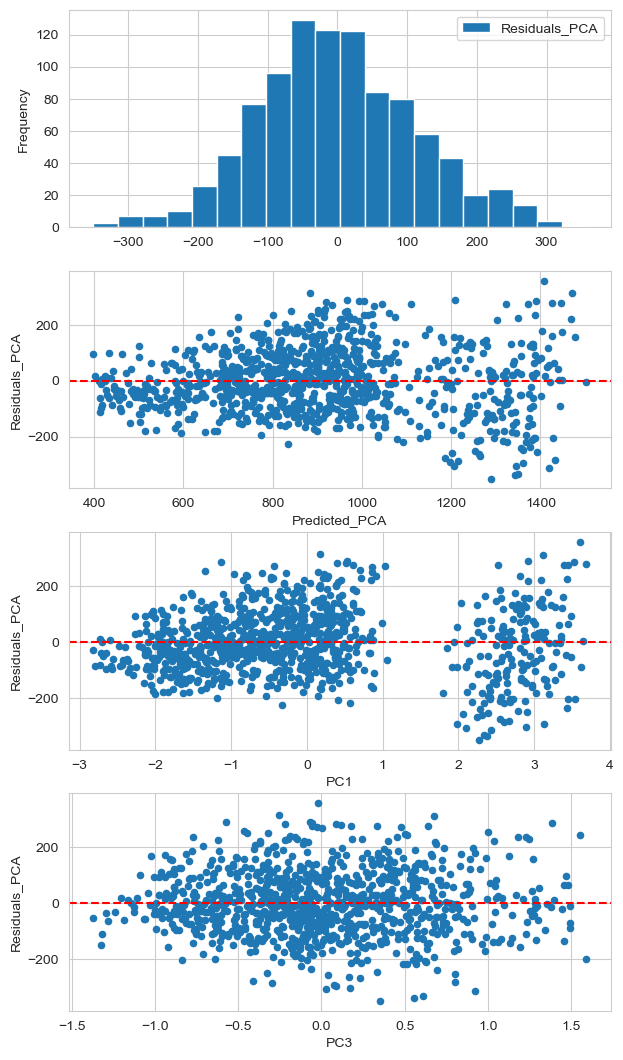

In [566]:
fig, ((g1), (g2), (g3), (g4)) = plt.subplots(4,1, figsize = (7, 13))
data.plot(y = "Residuals_PCA", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Predicted_PCA", y = "Residuals_PCA", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "PC1", y = "Residuals_PCA", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "PC3", y = "Residuals_PCA", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
plt.show()

In [567]:
formula = "Calories_Burned ~ PC1 + PC3"
results = cross_validate_model_with_train_test(data, formula, "Calories_Burned")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 13172.8498, Std = 392.8522
Test_MSE: Mean = 13253.3222, Std = 1555.4371
Train_RMSE: Mean = 114.7601, Std = 1.7201
Test_RMSE: Mean = 114.9304, Std = 6.6574
Train_MAE: Mean = 90.8183, Std = 1.1638
Test_MAE: Mean = 91.0298, Std = 4.5025
Train_R2: Mean = 0.8226, Std = 0.0046
Test_R2: Mean = 0.8212, Std = 0.0175
Train_RSE: Mean = 114.9819, Std = 1.7233
Test_RSE: Mean = 115.8266, Std = 6.7080


In [568]:
model4 = smf.ols(formula="Calories_Burned_SQRT ~ PC1 + I(PC1**2) + PC3", data=data).fit()
data["Predicted_PCA"] = model4.predict()
print(model4.summary())

                             OLS Regression Results                             
Dep. Variable:     Calories_Burned_SQRT   R-squared:                       0.840
Model:                              OLS   Adj. R-squared:                  0.840
Method:                   Least Squares   F-statistic:                     1696.
Date:                  Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                          19:41:54   Log-Likelihood:                -1975.8
No. Observations:                   973   AIC:                             3960.
Df Residuals:                       969   BIC:                             3979.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      30.3615      0.

In [569]:
data["Residuals_PCA"] = data["Calories_Burned_SQRT"] - data["Predicted_PCA"]
std_residuals = data["Residuals_PCA"].std()
data["Std_Residuals_PCA"] = data["Residuals_PCA"] / std_residuals
data

Age  Gender    Weight    Height   Max_BPM   Avg_BPM  Resting_BPM  \
0    1.422343       0  0.681493 -0.098545  0.010081  0.922970    -0.303555   
1    0.600965       1  0.049316 -1.508604 -0.076726  0.504494     0.515749   
2   -0.548964       1 -0.271491 -0.490228 -1.118414 -1.518142    -1.122858   
3   -1.123928       0 -0.974433 -0.176881  0.878155  1.411193    -0.849757   
4   -0.056137       0 -1.309393  0.528148  0.704540  0.992716     0.788850   
..        ...     ...       ...       ...       ...       ...          ...   
968 -1.206066       0  0.624880  0.136465  0.617733  0.992716     0.652299   
969 -1.123928       0 -0.342257 -0.881911  0.357311  1.550685    -0.849757   
970  1.668756       1 -0.634756  0.293138  1.225384 -1.657634    -1.259409   
971 -0.548964       0  2.478951  0.841495  1.572614  0.155764    -0.030454   
972  0.600965       0  0.700363 -0.725238 -1.205221  0.155764     0.515749   

     Session_Duration  Calories_Burned  Workout_Type  ...  Predicted_SQRT  \
0            1.264598           1313.0             3  ...       35.980612   
1            0.127098            883.0             1  ...       29.499616   
2           -0.427068            677.0             0  ...       27.269943   
3           -1.943735            532.0             2  ...       21.860224   
4           -1.797902            556.0             2  ...       22.502059   
..                ...              ...           ...  ...             ...   
968          0.914598           1364.0             2  ...       34.440206   
969          0.360432           1260.0             2  ...       32.001230   
970          1.352098            929.0             0  ...       34.428367   
971         -0.456235            883.0             1  ...       28.406949   
972         -1.477068            542.0             2  ...       23.914098   

     Residuals_SQRT  Std_Residuals_SQRT       PC1       PC2       PC3  \
0          0.254729            0.148599  2.565440 -0.831850  0.174721   
1          0.215700            0.125830 -0.247599  1.559046 -0.234077   
2         -1.250719           -0.729618 -0.513796  1.334594 -0.661771   
3          1.204902            0.702890 -1.899279 -0.304226 -1.092488   
4          1.077593            0.628623 -1.851305 -0.208840 -0.976218   
..              ...                 ...       ...       ...       ...   
968        2.492164            1.453825  2.585195 -1.282680 -0.127055   
969        3.495249            2.038983 -0.801386 -0.584413  1.229232   
970       -3.948865           -2.303604  2.596481  0.449783 -0.297805   
971        1.308367            0.763247 -0.594738  0.204774 -0.131098   
972       -0.633205           -0.369385 -2.132955 -0.590154 -0.113282   

          PC4  Predicted_PCA  Residuals_PCA  Std_Residuals_PCA  
0    0.292413      36.015095       0.220247           0.119411  
1   -0.005357      28.930701       0.784615           0.425395  
2    0.091214      26.782141      -0.762917          -0.413631  
3   -0.132590      20.900424       2.164701           1.173637  
4   -0.153481      21.451795       2.127857           1.153661  
..        ...            ...            ...                ...  
968  0.314918      35.054032       1.878339           1.018380  
969 -0.194657      32.120183       3.376296           1.830527  
970 -0.058221      34.510306      -4.030805          -2.185383  
971  0.447646      28.283653       1.431663           0.776205  
972  0.217514      23.255257       0.025637           0.013899  

[973 rows x 30 columns]

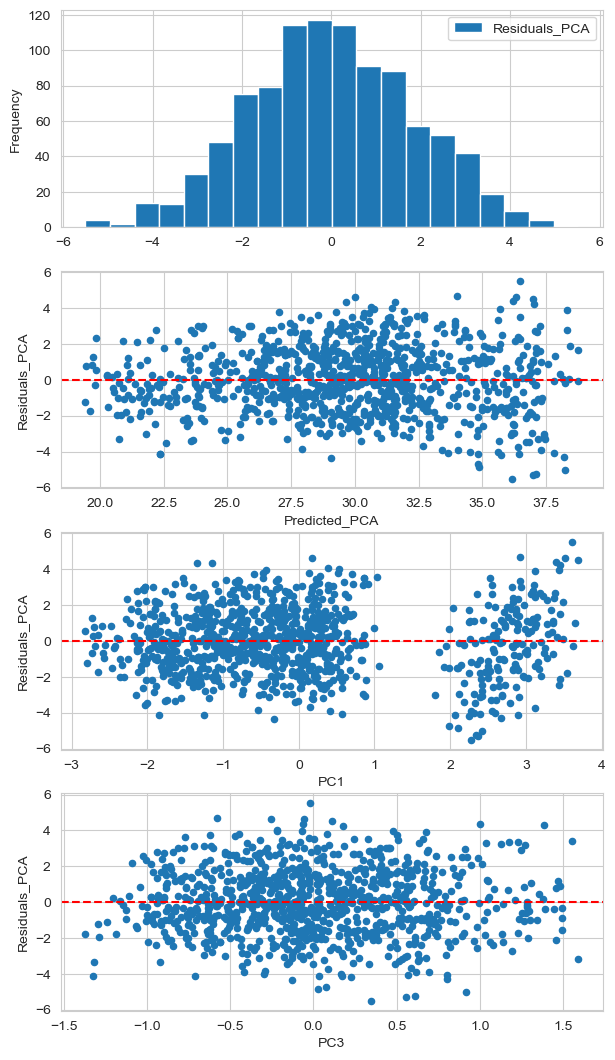

In [570]:
fig, ((g1), (g2), (g3), (g4)) = plt.subplots(4,1, figsize = (7, 13))
data.plot(y = "Residuals_PCA", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Predicted_PCA", y = "Residuals_PCA", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "PC1", y = "Residuals_PCA", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "PC3", y = "Residuals_PCA", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
plt.show()

In [571]:
formula = "Calories_Burned_SQRT ~ PC1 + I(PC1**2) + PC3"
results = cross_validate_model_with_train_test(data, formula, "Calories_Burned_SQRT")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 13269.9856, Std = 401.8785
Test_MSE: Mean = 13436.5212, Std = 1559.3182
Train_RMSE: Mean = 115.1820, Std = 1.7580
Test_RMSE: Mean = 115.7289, Std = 6.5838
Train_MAE: Mean = 89.8855, Std = 1.0771
Test_MAE: Mean = 90.4483, Std = 4.1734
Train_R2: Mean = 0.8213, Std = 0.0038
Test_R2: Mean = 0.8191, Std = 0.0132
Train_RSE: Mean = 115.4791, Std = 1.7624
Test_RSE: Mean = 116.9369, Std = 6.6516


In [572]:
#WE HAVE 4 GOOD PREDICTORS TO USE FOR OUR TARGET WITH CORRELATION GREATER THAN 0.5
#WE HAVE ONE PREDICTOR WITH VIF GREATER THAN 5, SO WE NEEDED TO TRANSFORM IT AND USE IT IN MODEL WITH OTHER PREDICTORS
#WE DID PCA, TO REDUCE DIMENSIONALITY AND TO REDUCE MULTYCOLINEARITY
#NOW LET'S TRY WITH SOME MORE FLEXIBLE MODEL
#XGBOOST

In [573]:
data_copy = pd.concat([data_copy, dataX], axis = 1)
data_copy

Age  Gender    Weight    Height   Max_BPM   Avg_BPM  Resting_BPM  \
0    1.422343       0  0.681493 -0.098545  0.010081  0.922970    -0.303555   
1    0.600965       1  0.049316 -1.508604 -0.076726  0.504494     0.515749   
2   -0.548964       1 -0.271491 -0.490228 -1.118414 -1.518142    -1.122858   
3   -1.123928       0 -0.974433 -0.176881  0.878155  1.411193    -0.849757   
4   -0.056137       0 -1.309393  0.528148  0.704540  0.992716     0.788850   
..        ...     ...       ...       ...       ...       ...          ...   
968 -1.206066       0  0.624880  0.136465  0.617733  0.992716     0.652299   
969 -1.123928       0 -0.342257 -0.881911  0.357311  1.550685    -0.849757   
970  1.668756       1 -0.634756  0.293138  1.225384 -1.657634    -1.259409   
971 -0.548964       0  2.478951  0.841495  1.572614  0.155764    -0.030454   
972  0.600965       0  0.700363 -0.725238 -1.205221  0.155764     0.515749   

     Session_Duration  Calories_Burned  Workout_Type  Fat_Percentage  \
0            1.264598           1313.0             3       -1.978321   
1            0.127098            883.0             1        1.426301   
2           -0.427068            677.0             0        1.346380   
3           -1.943735            532.0             2        0.611110   
4           -1.797902            556.0             2        0.675047   
..                ...              ...           ...             ...   
968          0.914598           1364.0             2       -2.393908   
969          0.360432           1260.0             2        0.003713   
970          1.352098            929.0             0       -0.987304   
971         -0.456235            883.0             1        0.515205   
972         -1.477068            542.0             2        0.611110   

     Water_Intake  Workout_Frequency  Experience_Level       BMI       PC1  \
0        1.455967                  4                 3  0.794278  2.565440   
1       -0.877898                  4                 2  1.064652 -0.247599   
2       -0.544488                  4                 2 -0.030361 -0.513796   
3       -0.877898                  3                 1 -0.976669 -1.899279   
4        0.289035                  3                 1 -1.580503 -1.851305   
..            ...                ...               ...       ...       ...   
968      1.455967                  4                 3  0.579482  2.585195   
969      0.622444                  2                 1  0.116842 -0.801386   
970      0.122330                  5                 3 -0.812942  2.596481   
971     -0.877898                  3                 2  1.926843 -0.594738   
972      1.455967                  2                 1  1.271938 -2.132955   

          PC2       PC3       PC4  
0   -0.831850  0.174721  0.292413  
1    1.559046 -0.234077 -0.005357  
2    1.334594 -0.661771  0.091214  
3   -0.304226 -1.092488 -0.132590  
4   -0.208840 -0.976218 -0.153481  
..        ...       ...       ...  
968 -1.282680 -0.127055  0.314918  
969 -0.584413  1.229232 -0.194657  
970  0.449783 -0.297805 -0.058221  
971  0.204774 -0.131098  0.447646  
972 -0.590154 -0.113282  0.217514  

[973 rows x 19 columns]

In [574]:
corr_matrix = data_copy.corr()
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(abs(corr_matrix), annot=True, cmap=plt.cm.autumn_r)
fig.tight_layout()
plt.show()

In [575]:
def calculate_rse(y_true, y_pred):
    rss = np.sum((y_true - y_pred) ** 2)
    rse = np.sqrt(rss / (len(y_true) - 1))
    return rse

In [576]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
    'max_depth': [2, 3, 4, 5,6,7,None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [2,4,6,8,10, 12, 14, 16],
    'lambda': [5.0, 6.0, 7.0, 8.0, 9.0, 10.0], 
    'alpha': [5.0, 6.0, 7.0, 8.0, 9.0, 10.0]   
}

X = data_copy.drop(columns=["Calories_Burned", "PC1", "PC2", "PC3", "PC4"])
y = data_copy['Calories_Burned']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  
    scoring='neg_mean_squared_error',
    cv=kf,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X, y)

best_xgb_model = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

train_mse_scores, test_mse_scores = [], []
train_rse_scores, test_rse_scores = [], []
train_mae_scores, test_mae_scores = [], []
train_rmse_scores, test_rmse_scores = [], []
train_r2_scores, test_r2_scores = [], []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_xgb_model.fit(X_train, y_train)
    train_predictions = best_xgb_model.predict(X_train)
    test_predictions = best_xgb_model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

    train_rse = calculate_rse(y_train, train_predictions)
    test_rse = calculate_rse(y_test, test_predictions)
    train_rse_scores.append(train_rse)
    test_rse_scores.append(test_rse)

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_mae_scores.append(train_mae)
    test_mae_scores.append(test_mae)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

results_df = pd.DataFrame({
    "Metric": ["Train_MSE", "Test_MSE", "Train_RSE", "Test_RSE", "Train_MAE", "Test_MAE", "Train_RMSE", "Test_RMSE", "Train_R2", "Test_R2"],
    "Mean": [
        np.mean(train_mse_scores),
        np.mean(test_mse_scores),
        np.mean(train_rse_scores),
        np.mean(test_rse_scores),
        np.mean(train_mae_scores),
        np.mean(test_mae_scores),
        np.mean(train_rmse_scores),
        np.mean(test_rmse_scores),
        np.mean(train_r2_scores),
        np.mean(test_r2_scores)
    ],
    "Std": [
        np.std(train_mse_scores),
        np.std(test_mse_scores),
        np.std(train_rse_scores),
        np.std(test_rse_scores),
        np.std(train_mae_scores),
        np.std(test_mae_scores),
        np.std(train_rmse_scores),
        np.std(test_rmse_scores),
        np.std(train_r2_scores),
        np.std(test_r2_scores)
    ]
})

print(results_df)


Best parameters: {'subsample': 0.6, 'n_estimators': 700, 'min_child_weight': 12, 'max_depth': 2, 'learning_rate': 0.05, 'lambda': 9.0, 'colsample_bytree': 1.0, 'alpha': 5.0}
       Metric        Mean        Std
0   Train_MSE  102.308914   7.126108
1    Test_MSE  242.695432  65.602354
2   Train_RSE   10.115171   0.351900
3    Test_RSE   15.478461   2.089427
4   Train_MAE    7.740992   0.321672
5    Test_MAE   11.594301   1.235993
6  Train_RMSE   10.108672   0.351674
7   Test_RMSE   15.438649   2.084121
8    Train_R2    0.998623   0.000076
9     Test_R2    0.996736   0.000817


In [577]:
best_xgb_model.fit(X, y)
data["Predicted_XGB"] = best_xgb_model.predict(X)
data["Residuals_XGB"] = data["Calories_Burned"] - data["Predicted_XGB"]
std_residuals = data["Residuals_XGB"].std()
data["Std_Residuals_XGB"] = data["Residuals_XGB"] / std_residuals
data

Age  Gender    Weight    Height   Max_BPM   Avg_BPM  Resting_BPM  \
0    1.422343       0  0.681493 -0.098545  0.010081  0.922970    -0.303555   
1    0.600965       1  0.049316 -1.508604 -0.076726  0.504494     0.515749   
2   -0.548964       1 -0.271491 -0.490228 -1.118414 -1.518142    -1.122858   
3   -1.123928       0 -0.974433 -0.176881  0.878155  1.411193    -0.849757   
4   -0.056137       0 -1.309393  0.528148  0.704540  0.992716     0.788850   
..        ...     ...       ...       ...       ...       ...          ...   
968 -1.206066       0  0.624880  0.136465  0.617733  0.992716     0.652299   
969 -1.123928       0 -0.342257 -0.881911  0.357311  1.550685    -0.849757   
970  1.668756       1 -0.634756  0.293138  1.225384 -1.657634    -1.259409   
971 -0.548964       0  2.478951  0.841495  1.572614  0.155764    -0.030454   
972  0.600965       0  0.700363 -0.725238 -1.205221  0.155764     0.515749   

     Session_Duration  Calories_Burned  Workout_Type  ...       PC1       PC2  \
0            1.264598           1313.0             3  ...  2.565440 -0.831850   
1            0.127098            883.0             1  ... -0.247599  1.559046   
2           -0.427068            677.0             0  ... -0.513796  1.334594   
3           -1.943735            532.0             2  ... -1.899279 -0.304226   
4           -1.797902            556.0             2  ... -1.851305 -0.208840   
..                ...              ...           ...  ...       ...       ...   
968          0.914598           1364.0             2  ...  2.585195 -1.282680   
969          0.360432           1260.0             2  ... -0.801386 -0.584413   
970          1.352098            929.0             0  ...  2.596481  0.449783   
971         -0.456235            883.0             1  ... -0.594738  0.204774   
972         -1.477068            542.0             2  ... -2.132955 -0.590154   

          PC3       PC4  Predicted_PCA  Residuals_PCA  Std_Residuals_PCA  \
0    0.174721  0.292413      36.015095       0.220247           0.119411   
1   -0.234077 -0.005357      28.930701       0.784615           0.425395   
2   -0.661771  0.091214      26.782141      -0.762917          -0.413631   
3   -1.092488 -0.132590      20.900424       2.164701           1.173637   
4   -0.976218 -0.153481      21.451795       2.127857           1.153661   
..        ...       ...            ...            ...                ...   
968 -0.127055  0.314918      35.054032       1.878339           1.018380   
969  1.229232 -0.194657      32.120183       3.376296           1.830527   
970 -0.297805 -0.058221      34.510306      -4.030805          -2.185383   
971 -0.131098  0.447646      28.283653       1.431663           0.776205   
972 -0.113282  0.217514      23.255257       0.025637           0.013899   

     Predicted_XGB  Residuals_XGB  Std_Residuals_XGB  
0      1310.372070       2.627930           0.265260  
1       888.563538      -5.563538          -0.561576  
2       681.180298      -4.180298          -0.421953  
3       532.078613      -0.078613          -0.007935  
4       576.768799     -20.768799          -2.096373  
..             ...            ...                ...  
968    1380.864136     -16.864136          -1.702242  
969    1246.486938      13.513062           1.363989  
970     935.783813      -6.783813          -0.684749  
971     881.949951       1.050049           0.105990  
972     532.645569       9.354431           0.944223  

[973 rows x 33 columns]

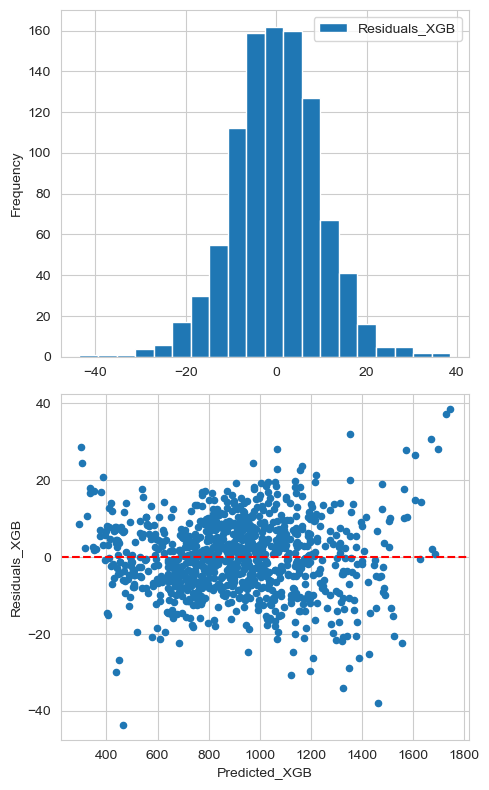

In [578]:
fig, ((g1), (g2)) = plt.subplots(2, 1, figsize = (5,8))
data.plot(y = "Residuals_XGB", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Predicted_XGB", y = "Residuals_XGB", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [579]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title("Feature Importance")
plt.show()

In [580]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
    'max_depth': [2, 3, 4, 5,6,7,None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [2,4,6,8,10, 12, 14, 16],
    'lambda': [1, 2, 3, 4, 5.0, 6.0, 7.0], 
    'alpha': [1, 2, 3, 4, 5.0, 6.0, 7.0]   
}

X = data_copy[["Session_Duration", "Avg_BPM", "Age", "Gender", "Fat_Percentage"]]
y = data_copy['Calories_Burned']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  
    scoring='neg_mean_squared_error',
    cv=kf,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X, y)

best_xgb_model = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

train_mse_scores, test_mse_scores = [], []
train_rse_scores, test_rse_scores = [], []
train_mae_scores, test_mae_scores = [], []
train_rmse_scores, test_rmse_scores = [], []
train_r2_scores, test_r2_scores = [], []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_xgb_model.fit(X_train, y_train)
    train_predictions = best_xgb_model.predict(X_train)
    test_predictions = best_xgb_model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

    train_rse = calculate_rse(y_train, train_predictions)
    test_rse = calculate_rse(y_test, test_predictions)
    train_rse_scores.append(train_rse)
    test_rse_scores.append(test_rse)

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_mae_scores.append(train_mae)
    test_mae_scores.append(test_mae)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

results_df = pd.DataFrame({
    "Metric": ["Train_MSE", "Test_MSE", "Train_RSE", "Test_RSE", "Train_MAE", "Test_MAE", "Train_RMSE", "Test_RMSE", "Train_R2", "Test_R2"],
    "Mean": [
        np.mean(train_mse_scores),
        np.mean(test_mse_scores),
        np.mean(train_rse_scores),
        np.mean(test_rse_scores),
        np.mean(train_mae_scores),
        np.mean(test_mae_scores),
        np.mean(train_rmse_scores),
        np.mean(test_rmse_scores),
        np.mean(train_r2_scores),
        np.mean(test_r2_scores)
    ],
    "Std": [
        np.std(train_mse_scores),
        np.std(test_mse_scores),
        np.std(train_rse_scores),
        np.std(test_rse_scores),
        np.std(train_mae_scores),
        np.std(test_mae_scores),
        np.std(train_rmse_scores),
        np.std(test_rmse_scores),
        np.std(train_r2_scores),
        np.std(test_r2_scores)
    ]
})

print(results_df)


Best parameters: {'subsample': 0.6, 'n_estimators': 700, 'min_child_weight': 12, 'max_depth': 2, 'learning_rate': 0.05, 'lambda': 3, 'colsample_bytree': 1.0, 'alpha': 1}
       Metric        Mean        Std
0   Train_MSE   81.216461   2.589084
1    Test_MSE  164.843525  49.366897
2   Train_RSE    9.016655   0.144434
3    Test_RSE   12.732731   1.890020
4   Train_MAE    6.950663   0.090236
5    Test_MAE    9.421278   1.231085
6  Train_RMSE    9.010862   0.144342
7   Test_RMSE   12.699981   1.885210
8    Train_R2    0.998906   0.000046
9     Test_R2    0.997793   0.000602


In [581]:
best_xgb_model.fit(X, y)
data["Predicted_XGB"] = best_xgb_model.predict(X)
data["Residuals_XGB"] = data["Calories_Burned"] - data["Predicted_XGB"]
std_residuals = data["Residuals_XGB"].std()
data["Std_Residuals_XGB"] = data["Residuals_XGB"] / std_residuals
data

Age  Gender    Weight    Height   Max_BPM   Avg_BPM  Resting_BPM  \
0    1.422343       0  0.681493 -0.098545  0.010081  0.922970    -0.303555   
1    0.600965       1  0.049316 -1.508604 -0.076726  0.504494     0.515749   
2   -0.548964       1 -0.271491 -0.490228 -1.118414 -1.518142    -1.122858   
3   -1.123928       0 -0.974433 -0.176881  0.878155  1.411193    -0.849757   
4   -0.056137       0 -1.309393  0.528148  0.704540  0.992716     0.788850   
..        ...     ...       ...       ...       ...       ...          ...   
968 -1.206066       0  0.624880  0.136465  0.617733  0.992716     0.652299   
969 -1.123928       0 -0.342257 -0.881911  0.357311  1.550685    -0.849757   
970  1.668756       1 -0.634756  0.293138  1.225384 -1.657634    -1.259409   
971 -0.548964       0  2.478951  0.841495  1.572614  0.155764    -0.030454   
972  0.600965       0  0.700363 -0.725238 -1.205221  0.155764     0.515749   

     Session_Duration  Calories_Burned  Workout_Type  ...       PC1       PC2  \
0            1.264598           1313.0             3  ...  2.565440 -0.831850   
1            0.127098            883.0             1  ... -0.247599  1.559046   
2           -0.427068            677.0             0  ... -0.513796  1.334594   
3           -1.943735            532.0             2  ... -1.899279 -0.304226   
4           -1.797902            556.0             2  ... -1.851305 -0.208840   
..                ...              ...           ...  ...       ...       ...   
968          0.914598           1364.0             2  ...  2.585195 -1.282680   
969          0.360432           1260.0             2  ... -0.801386 -0.584413   
970          1.352098            929.0             0  ...  2.596481  0.449783   
971         -0.456235            883.0             1  ... -0.594738  0.204774   
972         -1.477068            542.0             2  ... -2.132955 -0.590154   

          PC3       PC4  Predicted_PCA  Residuals_PCA  Std_Residuals_PCA  \
0    0.174721  0.292413      36.015095       0.220247           0.119411   
1   -0.234077 -0.005357      28.930701       0.784615           0.425395   
2   -0.661771  0.091214      26.782141      -0.762917          -0.413631   
3   -1.092488 -0.132590      20.900424       2.164701           1.173637   
4   -0.976218 -0.153481      21.451795       2.127857           1.153661   
..        ...       ...            ...            ...                ...   
968 -0.127055  0.314918      35.054032       1.878339           1.018380   
969  1.229232 -0.194657      32.120183       3.376296           1.830527   
970 -0.297805 -0.058221      34.510306      -4.030805          -2.185383   
971 -0.131098  0.447646      28.283653       1.431663           0.776205   
972 -0.113282  0.217514      23.255257       0.025637           0.013899   

     Predicted_XGB  Residuals_XGB  Std_Residuals_XGB  
0      1304.248291       8.751709           1.046687  
1       888.611267      -5.611267          -0.671097  
2       675.798828       1.201172           0.143658  
3       533.410645      -1.410645          -0.168710  
4       579.879089     -23.879089          -2.855892  
..             ...            ...                ...  
968    1374.484741     -10.484741          -1.253955  
969    1252.052124       7.947876           0.950550  
970     919.449890       9.550110           1.142174  
971     884.868958      -1.868958          -0.223524  
972     528.114197      13.885803           1.660715  

[973 rows x 33 columns]

In [582]:
fig, ((g1), (g2)) = plt.subplots(2,1, figsize = (5,8))
data.plot(y = "Residuals_XGB", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Predicted_XGB", y = "Residuals_XGB", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
plt.show()


In [583]:
#TRY TO DETECT PROBLEM WITH THIS RESIDUALS (POTENTIAL OUTLIERS) AND TRY TO DO SOMETHING WITH DATA SET 
#TRY FEATURE ENGINEERING

In [595]:
numeric_features = ['Session_Duration', 'Avg_BPM', 'Age', 'Fat_Percentage']

categorical_features = ['Gender']
def manual_encode_gender(X):
    return X.replace({'Male': 0, 'Female': 1}).astype(int)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_features),
        ('cat', FunctionTransformer(manual_encode_gender), categorical_features) 
    ])

final_xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgboost', random_search.best_estimator_)
])

X = raw_data[["Session_Duration", "Avg_BPM", "Age", "Gender", "Fat_Percentage"]]
y = raw_data['Calories_Burned']

final_xgb_model.fit(X, y)

C:\Users\Luka\AppData\Local\Temp\ipykernel_13852\1672364678.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return X.replace({'Male': 0, 'Female': 1}).astype(int)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Session_Duration',
                                                   'Avg_BPM', 'Age',
                                                   'Fat_Percentage']),
                                                 ('cat',
                                                  FunctionTransformer(func=<function manual_encode_gender at 0x000001BAC3E7B240>),
                                                  ['Gender'])])),
                ('xgboost',
                 XGBRegressor(alpha=1, base_score=None, booster=None,
                              callbacks=None, colsample_bylevel=None,
                              colsample...
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, lambda=3,
                              learning_rate=0.05, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=2, max_leaves=None,
                              min_child_weight=12, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=700, n_jobs=None, ...))])

In [597]:
dump(final_xgb_model, 'model.joblib')
print("Model saved")

Model saved
